In [154]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.options.display.float_format = '{:.5f}'.format
#https://tsfresh.readthedocs.io/en/latest/text/list_of_features.html

In [2]:
df = pd.read_csv('./data/norphlet_subset_moving_window_additional_features_20200704.csv', encoding='utf8',
                dtype={'wellname': str, 'field': str,  'field_part': str, 'filename' : str,
                       'wellname_old': str, 'dataset_name': str, 'depth_range': str})

df = df[[c for c in df.columns if 'Unnamed' not in c]]

corr_features = ['density_g_cm3', 'rdeep_ohm_m', 'gr_gapi', 'neutron_cfcf', 'nmr_ff_vv', 'nmr_tpor_vv', 'dt']

In [3]:
df.head()

,wellname,field,field_part,md_ft,density_g_cm3,dtc_us_ft,dts_us_ft,fluid,gr_gapi,neutron_cfcf,nmr_bw_vv,nmr_cbw_vv,nmr_ff_vv,nmr_tpor_vv,rdeep_ohm_m,tvd_ft,tvdbml_ft,tvdss_ft,filename,wellname_old,dataset_name,rmedium_ohm_m,rshallow_ohm_m,dt,density_g_cm3_abs_energy,density_g_cm3_absolute_sum_of_changes,density_g_cm3_cid_ce,density_g_cm3_count_above_mean,density_g_cm3_count_below_mean,density_g_cm3_first_location_of_maximum,density_g_cm3_first_location_of_minimum,density_g_cm3_last_location_of_maximum,density_g_cm3_last_location_of_minimum,density_g_cm3_has_duplicate_max,density_g_cm3_has_duplicate_min,density_g_cm3_kurtosis,density_g_cm3_longest_strike_above_mean,density_g_cm3_longest_strike_below_mean,density_g_cm3_minimum,density_g_cm3_maximum,density_g_cm3_mean,density_g_cm3_median,density_g_cm3_mean_change,density_g_cm3_mean_abs_change,density_g_cm3_mean_second_derivative_central,density_g_cm3_percentage_of_reoccurring_datapoints_to_all_datapoints,density_g_cm3_ratio_beyond_r_sigma,density_g_cm3_ratio_value_number_to_time_series_length,density_g_cm3_sample_entropy,density_g_cm3_skewness,density_g_cm3_standard_deviation,density_g_cm3_sum_of_reoccurring_data_points,density_g_cm3_sum_of_reoccurring_values,density_g_cm3_sum_values,density_g_cm3_variance,density_g_cm3_variation_coefficient,rdeep_ohm_m_abs_energy,rdeep_ohm_m_absolute_sum_of_changes,rdeep_ohm_m_cid_ce,rdeep_ohm_m_count_above_mean,rdeep_ohm_m_count_below_mean,rdeep_ohm_m_first_location_of_maximum,rdeep_ohm_m_first_location_of_minimum,rdeep_ohm_m_last_location_of_maximum,rdeep_ohm_m_last_location_of_minimum,rdeep_ohm_m_has_duplicate_max,rdeep_ohm_m_has_duplicate_min,rdeep_ohm_m_kurtosis,rdeep_ohm_m_longest_strike_above_mean,rdeep_ohm_m_longest_strike_below_mean,rdeep_ohm_m_minimum,rdeep_ohm_m_maximum,rdeep_ohm_m_mean,rdeep_ohm_m_median,rdeep_ohm_m_mean_change,rdeep_ohm_m_mean_abs_change,rdeep_ohm_m_mean_second_derivative_central,rdeep_ohm_m_percentage_of_reoccurring_datapoints_to_all_datapoints,rdeep_ohm_m_ratio_beyond_r_sigma,rdeep_ohm_m_ratio_value_number_to_time_series_length,rdeep_ohm_m_sample_entropy,rdeep_ohm_m_skewness,rdeep_ohm_m_standard_deviation,rdeep_ohm_m_sum_of_reoccurring_data_points,rdeep_ohm_m_sum_of_reoccurring_values,rdeep_ohm_m_sum_values,rdeep_ohm_m_variance,rdeep_ohm_m_variation_coefficient,gr_gapi_abs_energy,gr_gapi_absolute_sum_of_changes,gr_gapi_cid_ce,gr_gapi_count_above_mean,gr_gapi_count_below_mean,gr_gapi_first_location_of_maximum,gr_gapi_first_location_of_minimum,gr_gapi_last_location_of_maximum,gr_gapi_last_location_of_minimum,gr_gapi_has_duplicate_max,gr_gapi_has_duplicate_min,gr_gapi_kurtosis,gr_gapi_longest_strike_above_mean,gr_gapi_longest_strike_below_mean,gr_gapi_minimum,gr_gapi_maximum,gr_gapi_mean,gr_gapi_median,gr_gapi_mean_change,gr_gapi_mean_abs_change,gr_gapi_mean_second_derivative_central,gr_gapi_percentage_of_reoccurring_datapoints_to_all_datapoints,gr_gapi_ratio_beyond_r_sigma,gr_gapi_ratio_value_number_to_time_series_length,gr_gapi_sample_entropy,gr_gapi_skewness,gr_gapi_standard_deviation,gr_gapi_sum_of_reoccurring_data_points,gr_gapi_sum_of_reoccurring_values,gr_gapi_sum_values,gr_gapi_variance,gr_gapi_variation_coefficient,neutron_cfcf_abs_energy,neutron_cfcf_absolute_sum_of_changes,neutron_cfcf_cid_ce,neutron_cfcf_count_above_mean,neutron_cfcf_count_below_mean,neutron_cfcf_first_location_of_maximum,neutron_cfcf_first_location_of_minimum,neutron_cfcf_last_location_of_maximum,neutron_cfcf_last_location_of_minimum,neutron_cfcf_has_duplicate_max,neutron_cfcf_has_duplicate_min,neutron_cfcf_kurtosis,neutron_cfcf_longest_strike_above_mean,neutron_cfcf_longest_strike_below_mean,neutron_cfcf_minimum,neutron_cfcf_maximum,neutron_cfcf_mean,neutron_cfcf_median,neutron_cfcf_mean_change,neutron_cfcf_mean_abs_change,neutron_cfcf_mean_second_derivative_central,neutron_cfcf_percentage_of_reoccurring_datapoints_to_all_datapoints,neutron_cfcf_ratio_beyond_r_sigma,neutron_cfcf_ratio_value_number_to_time_series_length,neutron_cfcf_sam

In [4]:
print(df.shape)
df.describe()

(14273, 248)


C:\Users\andrew.nedilko\Anaconda3\envs\ssedb\lib\site-packages\numpy\lib\function_base.py:3937: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


,md_ft,density_g_cm3,dtc_us_ft,dts_us_ft,fluid,gr_gapi,neutron_cfcf,nmr_bw_vv,nmr_cbw_vv,nmr_ff_vv,nmr_tpor_vv,rdeep_ohm_m,tvd_ft,tvdbml_ft,tvdss_ft,rmedium_ohm_m,rshallow_ohm_m,dt,density_g_cm3_abs_energy,density_g_cm3_absolute_sum_of_changes,density_g_cm3_cid_ce,density_g_cm3_count_above_mean,density_g_cm3_count_below_mean,density_g_cm3_first_location_of_maximum,density_g_cm3_first_location_of_minimum,density_g_cm3_last_location_of_maximum,density_g_cm3_last_location_of_minimum,density_g_cm3_kurtosis,density_g_cm3_longest_strike_above_mean,density_g_cm3_longest_strike_below_mean,density_g_cm3_minimum,density_g_cm3_maximum,density_g_cm3_mean,density_g_cm3_median,density_g_cm3_mean_change,density_g_cm3_mean_abs_change,density_g_cm3_mean_second_derivative_central,density_g_cm3_percentage_of_reoccurring_datapoints_to_all_datapoints,density_g_cm3_ratio_beyond_r_sigma,density_g_cm3_ratio_value_number_to_time_series_length,density_g_cm3_sample_entropy,density_g_cm3_skewness,density_g_cm3_standard_deviation,density_g_cm3_sum_of_reoccurring_data_points,density_g_cm3_sum_of_reoccurring_values,density_g_cm3_sum_values,density_g_cm3_variance,density_g_cm3_variation_coefficient,rdeep_ohm_m_abs_energy,rdeep_ohm_m_absolute_sum_of_changes,rdeep_ohm_m_cid_ce,rdeep_ohm_m_count_above_mean,rdeep_ohm_m_count_below_mean,rdeep_ohm_m_first_location_of_maximum,rdeep_ohm_m_first_location_of_minimum,rdeep_ohm_m_last_location_of_maximum,rdeep_ohm_m_last_location_of_minimum,rdeep_ohm_m_kurtosis,rdeep_ohm_m_longest_strike_above_mean,rdeep_ohm_m_longest_strike_below_mean,rdeep_ohm_m_minimum,rdeep_ohm_m_maximum,rdeep_ohm_m_mean,rdeep_ohm_m_median,rdeep_ohm_m_mean_change,rdeep_ohm_m_mean_abs_change,rdeep_ohm_m_mean_second_derivative_central,rdeep_ohm_m_percentage_of_reoccurring_datapoints_to_all_datapoints,rdeep_ohm_m_ratio_beyond_r_sigma,rdeep_ohm_m_ratio_value_number_to_time_series_length,rdeep_ohm_m_sample_entropy,rdeep_ohm_m_skewness,rdeep_ohm_m_standard_deviation,rdeep_ohm_m_sum_of_reoccurring_data_points,rdeep_ohm_m_sum_of_reoccurring_values,rdeep_ohm_m_sum_values,rdeep_ohm_m_variance,rdeep_ohm_m_variation_coefficient,gr_gapi_abs_energy,gr_gapi_absolute_sum_of_changes,gr_gapi_cid_ce,gr_gapi_count_above_mean,gr_gapi_count_below_mean,gr_gapi_first_location_of_maximum,gr_gapi_first_location_of_minimum,gr_gapi_last_location_of_maximum,gr_gapi_last_location_of_minimum,gr_gapi_kurtosis,gr_gapi_longest_strike_above_mean,gr_gapi_longest_strike_below_mean,gr_gapi_minimum,gr_gapi_maximum,gr_gapi_mean,gr_gapi_median,gr_gapi_mean_change,gr_gapi_mean_abs_change,gr_gapi_mean_second_derivative_central,gr_gapi_percentage_of_reoccurring_datapoints_to_all_datapoints,gr_gapi_ratio_beyond_r_sigma,gr_gapi_ratio_value_number_to_time_series_length,gr_gapi_sample_entropy,gr_gapi_skewness,gr_gapi_standard_deviation,gr_gapi_sum_of_reoccurring_data_points,gr_gapi_sum_of_reoccurring_values,gr_gapi_sum_values,gr_gapi_variance,gr_gapi_variation_coefficient,neutron_cfcf_abs_energy,neutron_cfcf_absolute_sum_of_changes,neutron_cfcf_cid_ce,neutron_cfcf_count_above_mean,neutron_cfcf_count_below_mean,neutron_cfcf_first_location_of_maximum,neutron_cfcf_first_location_of_minimum,neutron_cfcf_last_location_of_maximum,neutron_cfcf_last_location_of_minimum,neutron_cfcf_kurtosis,neutron_cfcf_longest_strike_above_mean,neutron_cfcf_longest_strike_below_mean,neutron_cfcf_minimum,neutron_cfcf_maximum,neutron_cfcf_mean,neutron_cfcf_median,neutron_cfcf_mean_change,neutron_cfcf_mean_abs_change,neutron_cfcf_mean_second_derivative_central,neutron_cfcf_percentage_of_reoccurring_datapoints_to_all_datapoints,neutron_cfcf_ratio_beyond_r_sigma,neutron_cfcf_ratio_value_number_to_time_series_length,neutron_cfcf_sample_entropy,neutron_cfcf_skewness,neutron_cfcf_standard_deviation,neutron_cfcf_sum_of_reoccurring_data_points,neutron_cfcf_sum_of_reoccurring_values,neutron_cfcf_sum_values,neutron_cfcf_variance,neutron_cfcf_variation_coefficient,nmr_ff_vv_abs_energy,nmr_ff_vv_absolute_sum_of_changes,nmr_ff_vv_cid_

In [5]:
original_and_clustering_cols = ['wellname', 'field', 'field_part', 'md_ft', 'density_g_cm3', 'dtc_us_ft', 'dts_us_ft', 'fluid',
                                'gr_gapi', 'neutron_cfcf', 'nmr_bw_vv', 'nmr_cbw_vv', 'nmr_ff_vv', 'nmr_tpor_vv', 'rdeep_ohm_m',
                                'tvd_ft', 'tvdbml_ft', 'tvdss_ft', 'filename', 'wellname_old', 'dataset_name', 'rmedium_ohm_m',
                                'rshallow_ohm_m', 'dt', 'kmeans4', 'kmeans5', 'kmeans6', 'kmeans7', 'kmeans8', 'spectral4',
                                'spectral5', 'spectral6', 'spectral7', 'spectral8', 'denoised4', 'denoised5', 'denoised6',
                                'denoised7','denoised8','em4','em5','em6','em7','em8','dbscan','depth_range','depth_bin']

new_cols = [c for c in df.columns if c not in original_and_clustering_cols]
len(new_cols)

224

In [6]:
df.isna().sum()

wellname                                                                    0
field                                                                       0
field_part                                                               7027
md_ft                                                                       0
density_g_cm3                                                               0
dtc_us_ft                                                                   0
dts_us_ft                                                                   0
fluid                                                                       0
gr_gapi                                                                     0
neutron_cfcf                                                                0
nmr_bw_vv                                                                   0
nmr_cbw_vv                                                                  0
nmr_ff_vv                                                       

In [7]:
# which rows have entropy as NaN
df[df['density_g_cm3_sample_entropy'].isna()]

,wellname,field,field_part,md_ft,density_g_cm3,dtc_us_ft,dts_us_ft,fluid,gr_gapi,neutron_cfcf,nmr_bw_vv,nmr_cbw_vv,nmr_ff_vv,nmr_tpor_vv,rdeep_ohm_m,tvd_ft,tvdbml_ft,tvdss_ft,filename,wellname_old,dataset_name,rmedium_ohm_m,rshallow_ohm_m,dt,density_g_cm3_abs_energy,density_g_cm3_absolute_sum_of_changes,density_g_cm3_cid_ce,density_g_cm3_count_above_mean,density_g_cm3_count_below_mean,density_g_cm3_first_location_of_maximum,density_g_cm3_first_location_of_minimum,density_g_cm3_last_location_of_maximum,density_g_cm3_last_location_of_minimum,density_g_cm3_has_duplicate_max,density_g_cm3_has_duplicate_min,density_g_cm3_kurtosis,density_g_cm3_longest_strike_above_mean,density_g_cm3_longest_strike_below_mean,density_g_cm3_minimum,density_g_cm3_maximum,density_g_cm3_mean,density_g_cm3_median,density_g_cm3_mean_change,density_g_cm3_mean_abs_change,density_g_cm3_mean_second_derivative_central,density_g_cm3_percentage_of_reoccurring_datapoints_to_all_datapoints,density_g_cm3_ratio_beyond_r_sigma,density_g_cm3_ratio_value_number_to_time_series_length,density_g_cm3_sample_entropy,density_g_cm3_skewness,density_g_cm3_standard_deviation,density_g_cm3_sum_of_reoccurring_data_points,density_g_cm3_sum_of_reoccurring_values,density_g_cm3_sum_values,density_g_cm3_variance,density_g_cm3_variation_coefficient,rdeep_ohm_m_abs_energy,rdeep_ohm_m_absolute_sum_of_changes,rdeep_ohm_m_cid_ce,rdeep_ohm_m_count_above_mean,rdeep_ohm_m_count_below_mean,rdeep_ohm_m_first_location_of_maximum,rdeep_ohm_m_first_location_of_minimum,rdeep_ohm_m_last_location_of_maximum,rdeep_ohm_m_last_location_of_minimum,rdeep_ohm_m_has_duplicate_max,rdeep_ohm_m_has_duplicate_min,rdeep_ohm_m_kurtosis,rdeep_ohm_m_longest_strike_above_mean,rdeep_ohm_m_longest_strike_below_mean,rdeep_ohm_m_minimum,rdeep_ohm_m_maximum,rdeep_ohm_m_mean,rdeep_ohm_m_median,rdeep_ohm_m_mean_change,rdeep_ohm_m_mean_abs_change,rdeep_ohm_m_mean_second_derivative_central,rdeep_ohm_m_percentage_of_reoccurring_datapoints_to_all_datapoints,rdeep_ohm_m_ratio_beyond_r_sigma,rdeep_ohm_m_ratio_value_number_to_time_series_length,rdeep_ohm_m_sample_entropy,rdeep_ohm_m_skewness,rdeep_ohm_m_standard_deviation,rdeep_ohm_m_sum_of_reoccurring_data_points,rdeep_ohm_m_sum_of_reoccurring_values,rdeep_ohm_m_sum_values,rdeep_ohm_m_variance,rdeep_ohm_m_variation_coefficient,gr_gapi_abs_energy,gr_gapi_absolute_sum_of_changes,gr_gapi_cid_ce,gr_gapi_count_above_mean,gr_gapi_count_below_mean,gr_gapi_first_location_of_maximum,gr_gapi_first_location_of_minimum,gr_gapi_last_location_of_maximum,gr_gapi_last_location_of_minimum,gr_gapi_has_duplicate_max,gr_gapi_has_duplicate_min,gr_gapi_kurtosis,gr_gapi_longest_strike_above_mean,gr_gapi_longest_strike_below_mean,gr_gapi_minimum,gr_gapi_maximum,gr_gapi_mean,gr_gapi_median,gr_gapi_mean_change,gr_gapi_mean_abs_change,gr_gapi_mean_second_derivative_central,gr_gapi_percentage_of_reoccurring_datapoints_to_all_datapoints,gr_gapi_ratio_beyond_r_sigma,gr_gapi_ratio_value_number_to_time_series_length,gr_gapi_sample_entropy,gr_gapi_skewness,gr_gapi_standard_deviation,gr_gapi_sum_of_reoccurring_data_points,gr_gapi_sum_of_reoccurring_values,gr_gapi_sum_values,gr_gapi_variance,gr_gapi_variation_coefficient,neutron_cfcf_abs_energy,neutron_cfcf_absolute_sum_of_changes,neutron_cfcf_cid_ce,neutron_cfcf_count_above_mean,neutron_cfcf_count_below_mean,neutron_cfcf_first_location_of_maximum,neutron_cfcf_first_location_of_minimum,neutron_cfcf_last_location_of_maximum,neutron_cfcf_last_location_of_minimum,neutron_cfcf_has_duplicate_max,neutron_cfcf_has_duplicate_min,neutron_cfcf_kurtosis,neutron_cfcf_longest_strike_above_mean,neutron_cfcf_longest_strike_below_mean,neutron_cfcf_minimum,neutron_cfcf_maximum,neutron_cfcf_mean,neutron_cfcf_median,neutron_cfcf_mean_change,neutron_cfcf_mean_abs_change,neutron_cfcf_mean_second_derivative_central,neutron_cfcf_percentage_of_reoccurring_datapoints_to_all_datapoints,neutron_cfcf_ratio_beyond_r_sigma,neutron_cfcf_ratio_value_number_to_time_series_length,neutron_cfcf_sam

In [8]:
entropy_cols = [c for c in df.columns if 'entropy' in c]
entropy_cols

['density_g_cm3_sample_entropy',
 'rdeep_ohm_m_sample_entropy',
 'gr_gapi_sample_entropy',
 'neutron_cfcf_sample_entropy',
 'nmr_ff_vv_sample_entropy',
 'nmr_tpor_vv_sample_entropy',
 'dt_sample_entropy']

In [9]:
# missing entropy values by feature
df[entropy_cols].isna().sum()

density_g_cm3_sample_entropy    1954
rdeep_ohm_m_sample_entropy      1433
gr_gapi_sample_entropy          3221
neutron_cfcf_sample_entropy     2528
nmr_ff_vv_sample_entropy        1802
nmr_tpor_vv_sample_entropy      2165
dt_sample_entropy               1162
dtype: int64

In [10]:
# missing entropy values by well
for col in entropy_cols:
    print('\t' + col)
    print(df[df[col].isna()]['wellname'].value_counts())
    print()

	density_g_cm3_sample_entropy
MC392-1ST1    551
MC612-1BP1    347
MC391-1       341
MC393-1       323
MC392-1       210
MC525-2       114
MC348-3ST1     68
Name: wellname, dtype: int64

	rdeep_ohm_m_sample_entropy
MC393-1       433
MC612-1BP1    281
MC392-1ST1    263
MC391-1       166
MC392-1       145
MC525-2       122
MC348-3ST1     23
Name: wellname, dtype: int64

	gr_gapi_sample_entropy
MC393-1       866
MC391-1       695
MC612-1BP1    513
MC392-1ST1    464
MC525-2       349
MC392-1       252
MC348-3ST1     82
Name: wellname, dtype: int64

	neutron_cfcf_sample_entropy
MC393-1       778
MC391-1       522
MC612-1BP1    410
MC392-1ST1    318
MC525-2       220
MC392-1       194
MC348-3ST1     86
Name: wellname, dtype: int64

	nmr_ff_vv_sample_entropy
MC393-1       558
MC392-1ST1    371
MC391-1       317
MC612-1BP1    190
MC525-2       153
MC392-1       152
MC348-3ST1     61
Name: wellname, dtype: int64

	nmr_tpor_vv_sample_entropy
MC393-1       740
MC391-1       426
MC392-1ST1    365
M

In [11]:
# infinity entropy values by feature
for col in entropy_cols:
    print('{}: {} inf values'.format(col, len(df[df[col] == np.inf])))

density_g_cm3_sample_entropy: 5297 inf values
rdeep_ohm_m_sample_entropy: 4215 inf values
gr_gapi_sample_entropy: 7178 inf values
neutron_cfcf_sample_entropy: 6038 inf values
nmr_ff_vv_sample_entropy: 4737 inf values
nmr_tpor_vv_sample_entropy: 5164 inf values
dt_sample_entropy: 4511 inf values


In [12]:
# infinity entropy values by well
for col in entropy_cols:
    print('\t' + col)
    print(df[df[col] == np.inf]['wellname'].value_counts())

	density_g_cm3_sample_entropy
MC393-1       1274
MC392-1ST1    1183
MC391-1       1003
MC612-1BP1     757
MC392-1        477
MC525-2        409
MC348-3ST1     194
Name: wellname, dtype: int64
	rdeep_ohm_m_sample_entropy
MC393-1       1065
MC392-1ST1    1021
MC612-1BP1     699
MC391-1        566
MC392-1        436
MC525-2        318
MC348-3ST1     110
Name: wellname, dtype: int64
	gr_gapi_sample_entropy
MC393-1       1887
MC392-1ST1    1472
MC391-1       1329
MC612-1BP1    1039
MC525-2        674
MC392-1        556
MC348-3ST1     221
Name: wellname, dtype: int64
	neutron_cfcf_sample_entropy
MC393-1       1760
MC391-1       1285
MC392-1ST1    1085
MC612-1BP1     854
MC525-2        467
MC392-1        452
MC348-3ST1     135
Name: wellname, dtype: int64
	nmr_ff_vv_sample_entropy
MC393-1       1558
MC391-1       1179
MC392-1ST1     950
MC392-1        363
MC525-2        306
MC348-3ST1     205
MC612-1BP1     176
Name: wellname, dtype: int64
	nmr_tpor_vv_sample_entropy
MC393-1       1663
MC391-

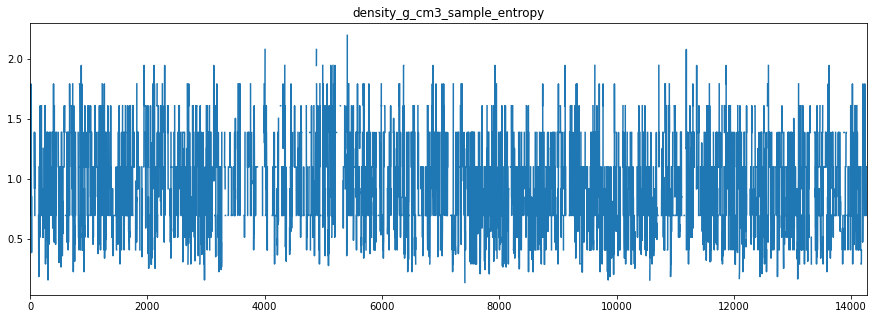

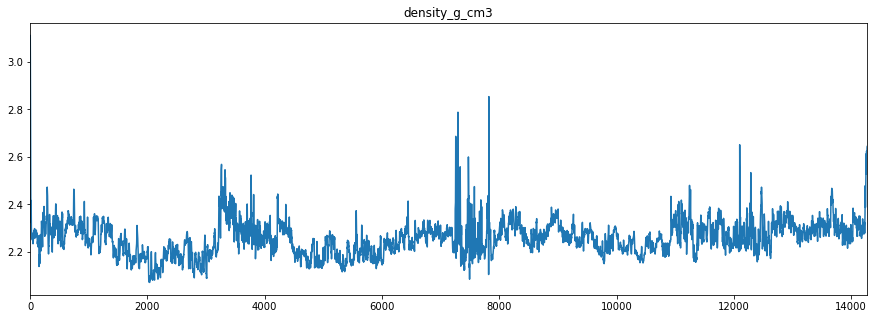

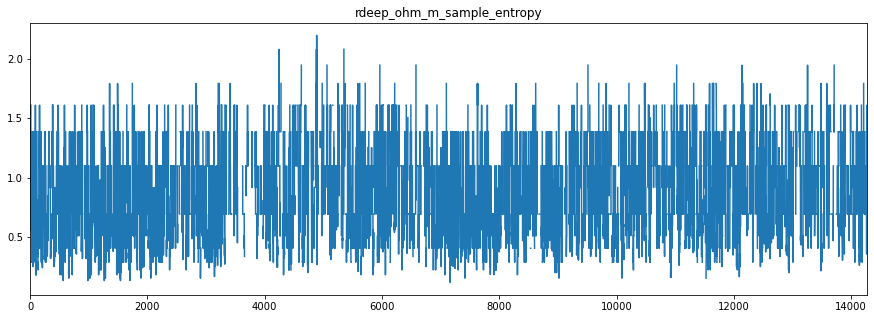

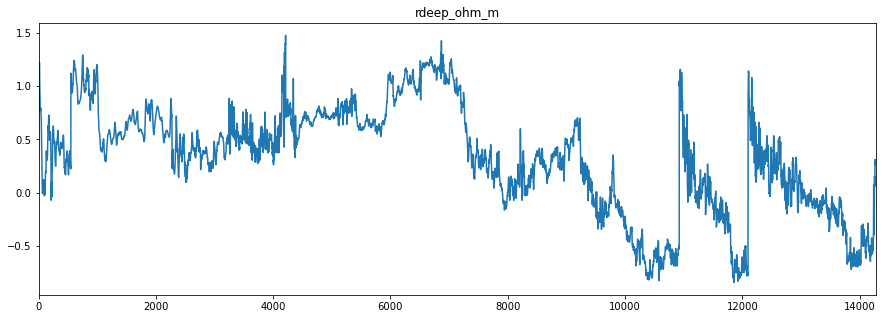

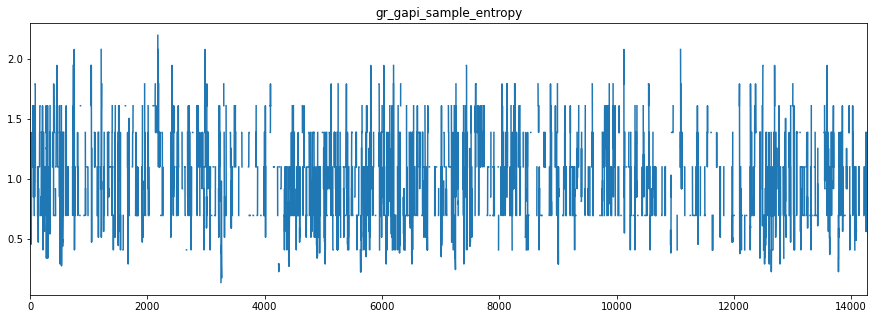

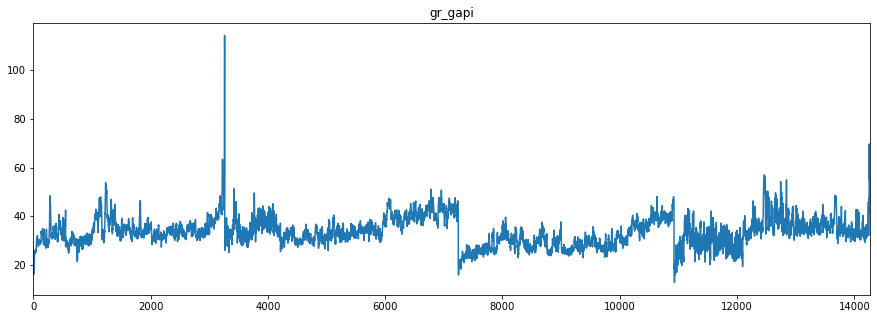

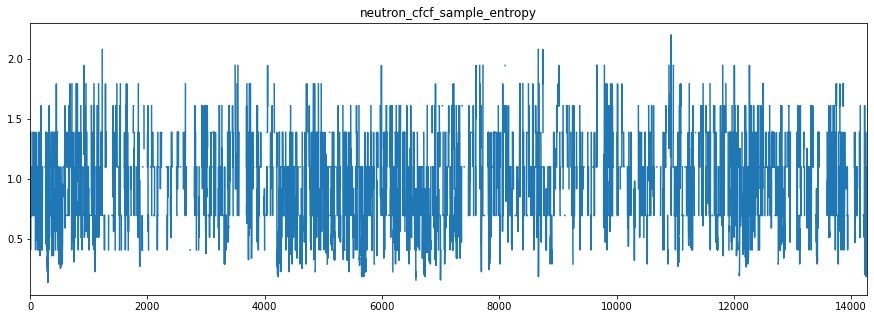

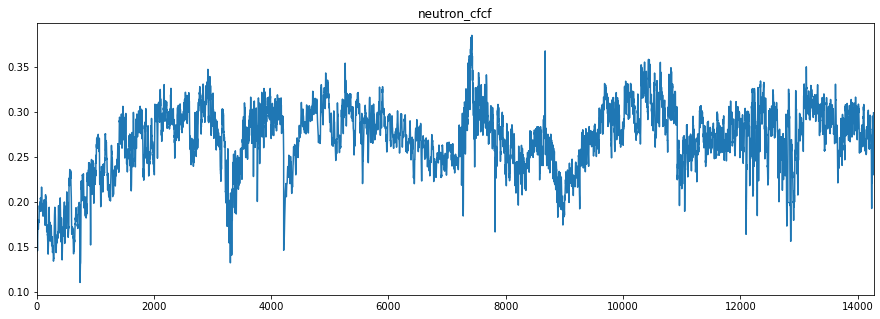

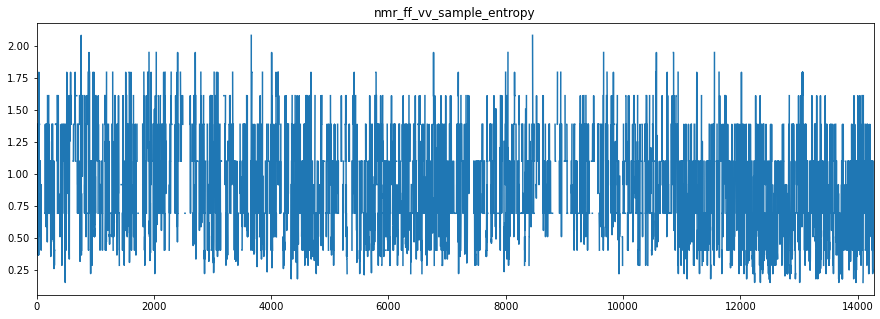

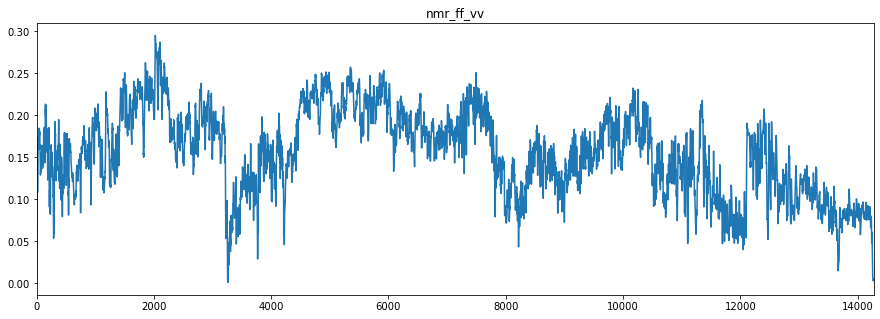

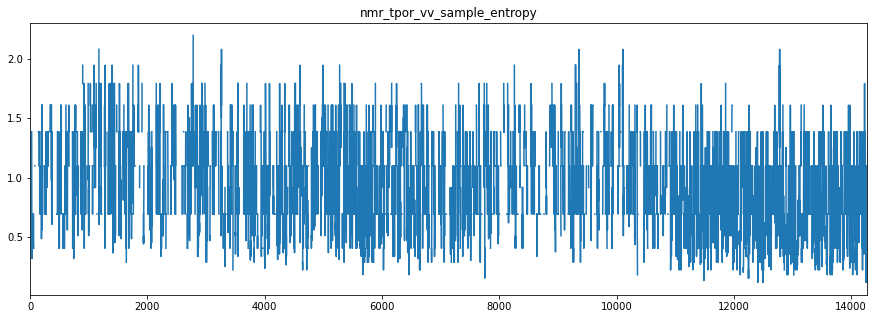

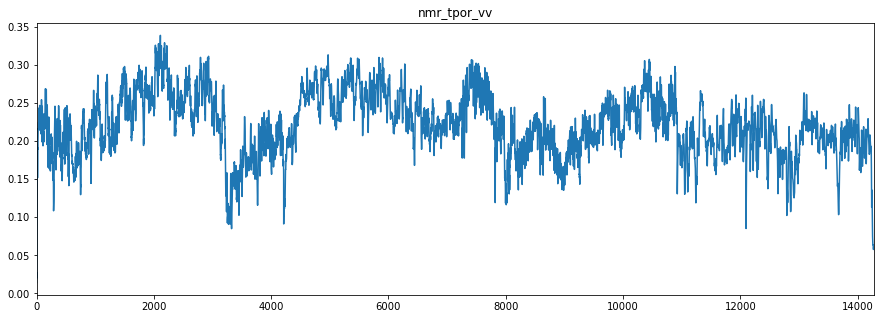

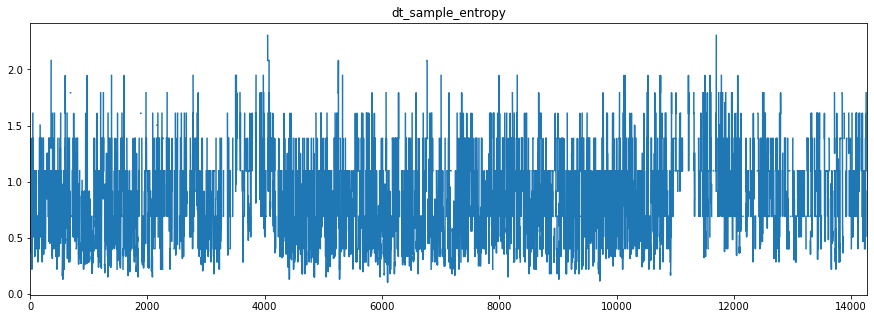

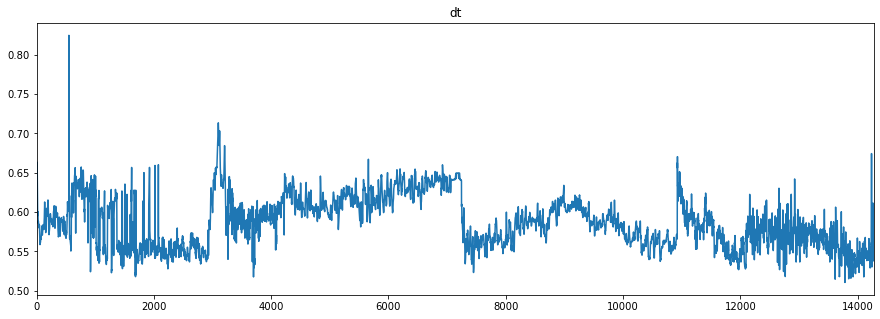

In [13]:
for c in entropy_cols:
    df[c].plot(figsize=(15,5), title=c)
    plt.show()
    temp = c.replace('_sample_entropy', '')
    df[temp].plot(figsize=(15,5), title=temp)
    plt.show()

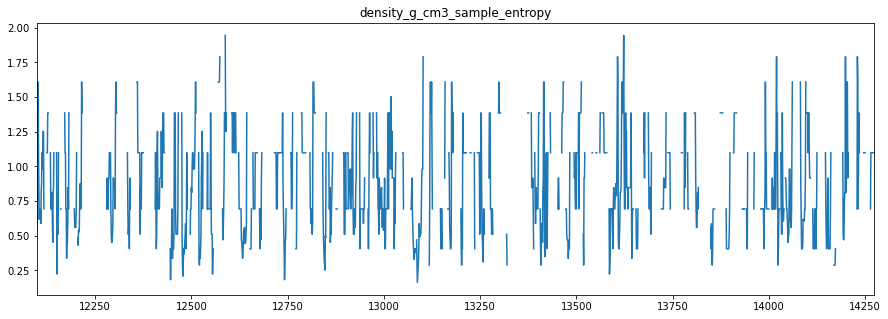

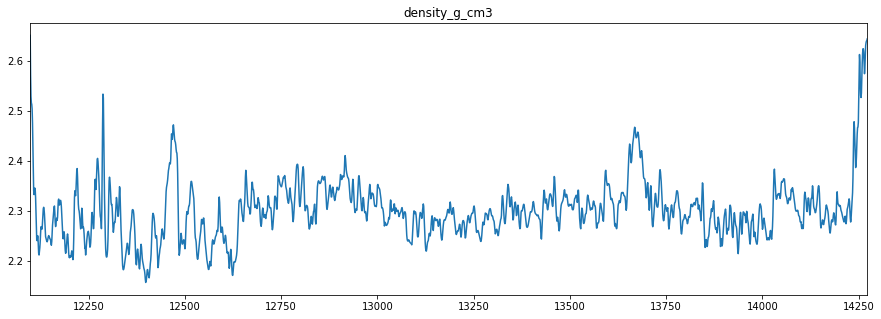

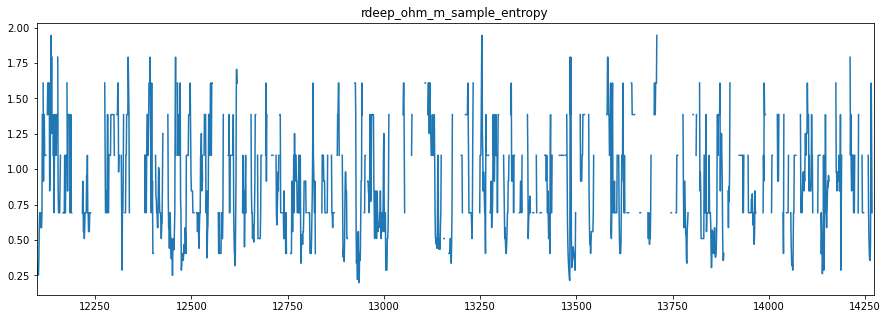

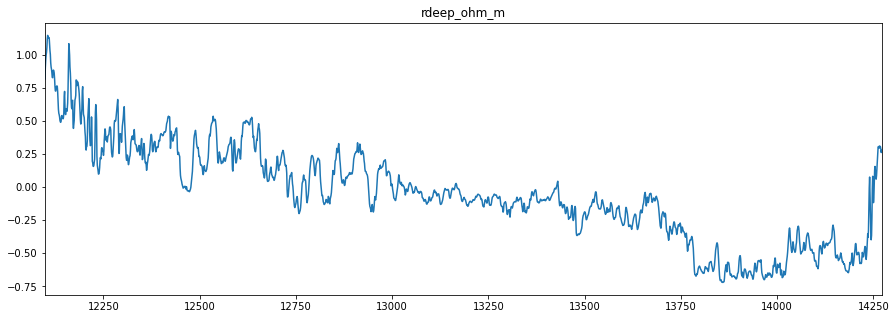

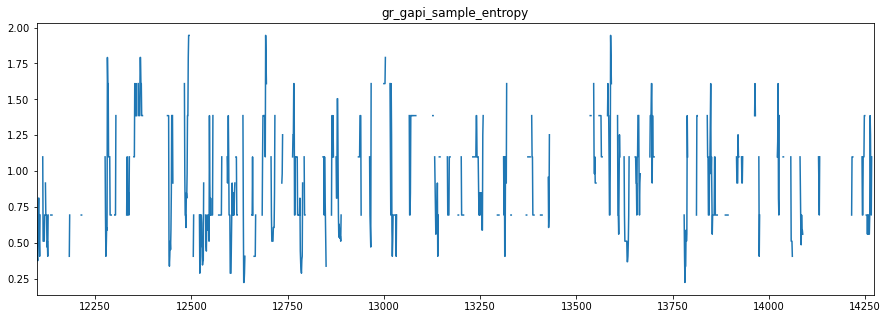

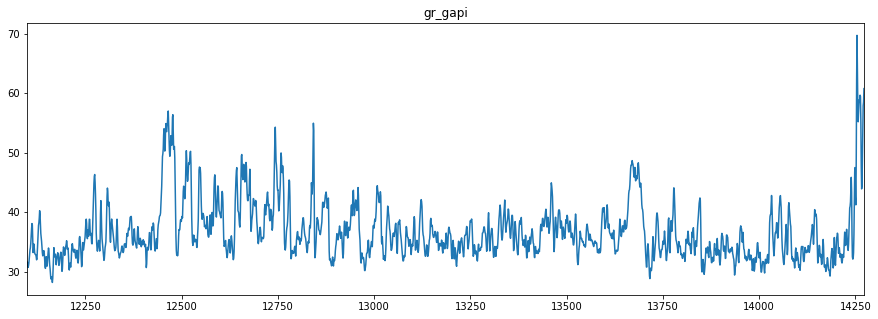

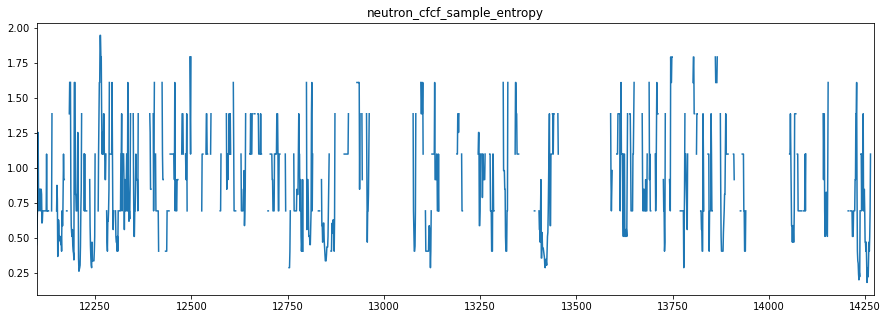

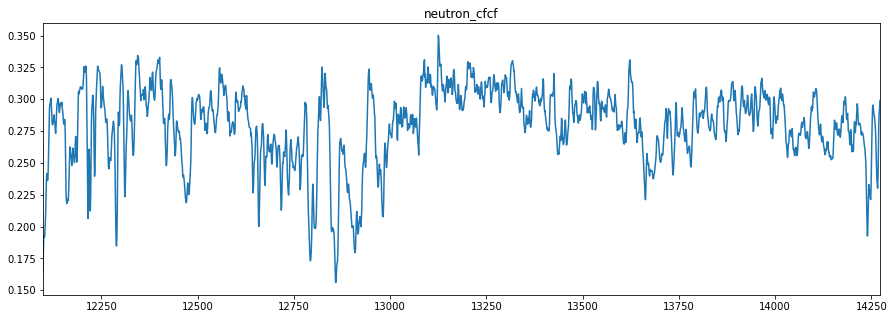

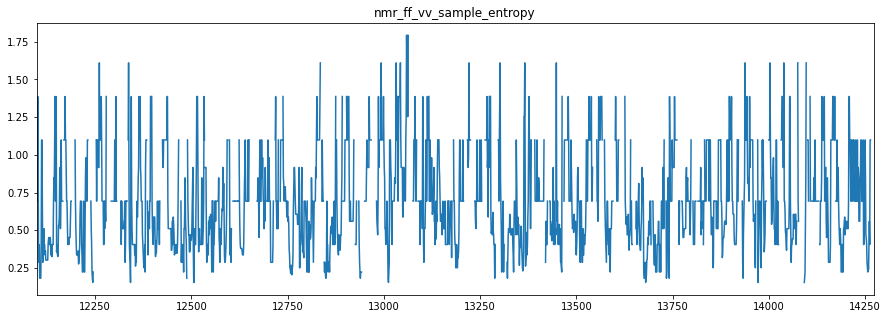

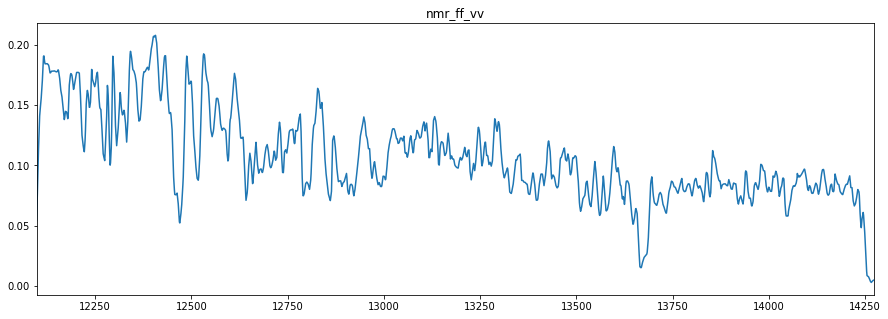

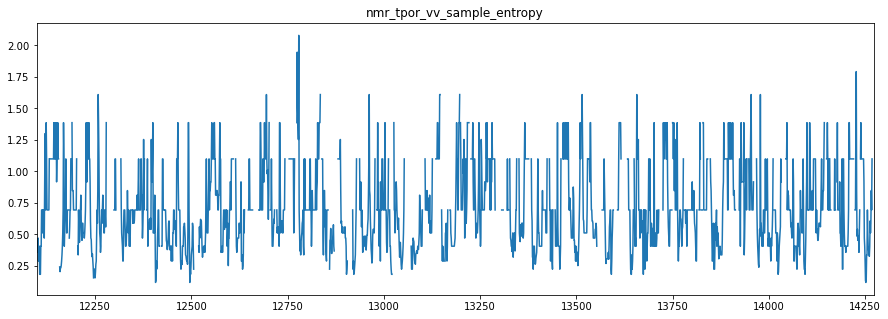

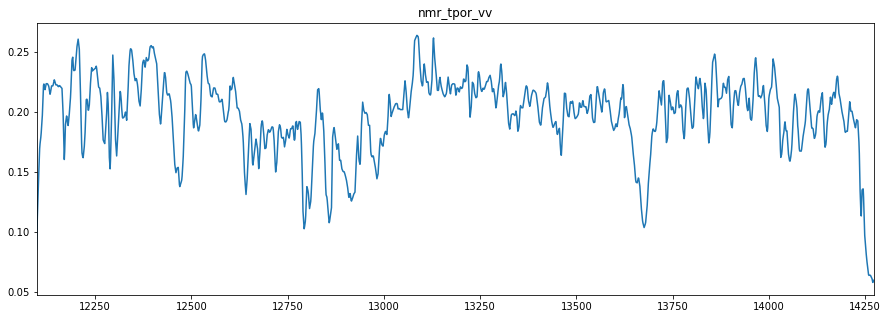

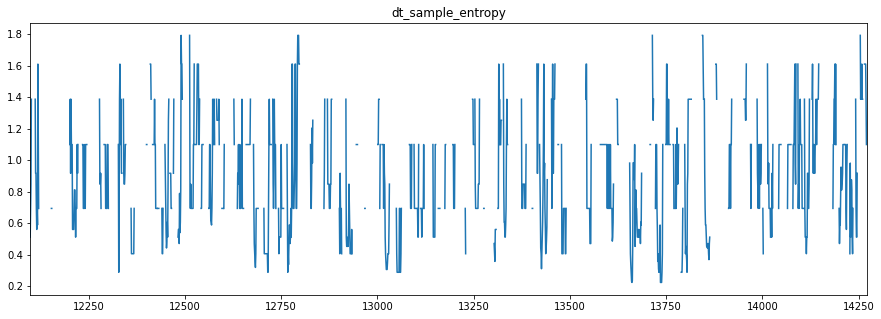

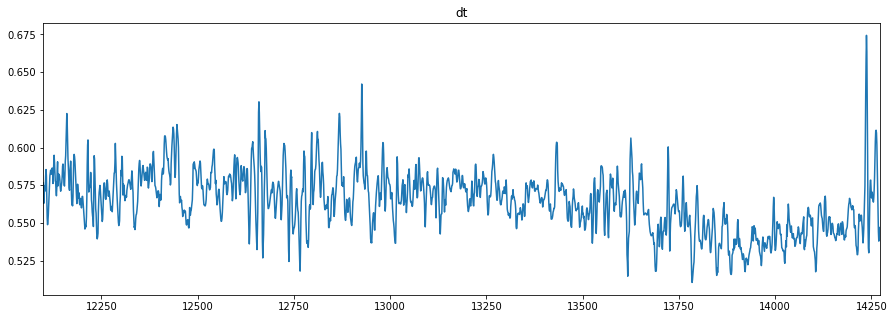

In [14]:
for c in entropy_cols:
    df[df.wellname == 'MC612-1BP1'][c].plot(figsize=(15,5), title=c)
    plt.show()
    temp = c.replace('_sample_entropy', '')
    df[df.wellname == 'MC612-1BP1'][temp].plot(figsize=(15,5), title=temp)
    plt.show()

#### DROP ENTROPY COLUMNS - TOO MANY VALUES = NAN or INFINITY, CLOSE TO 50%

In [15]:
# group additional features by original feature, exclude entropy
feature_map = dict()
for feature in corr_features:
    values = [col for col in df.columns if feature + '_' in col and 'entropy' not in col]
    feature_map[feature] = values

In [16]:
# convert boolean to numeric
df = df.replace('False', 0)
df = df.replace('True', 1)

In [17]:
# avoid scientific notation
def float2str(values):
    return f'{values:>.10f}'

# correlation of additional features with an original feature
def print_corr(feat2, feat1, method='spearman'):                  #'pearson', 'kendall'
        
    print('\n{} vs. {} (method = {})\n'.format(feat2.upper(), feat1.upper(), method))
    print('\tMAIN: {}\n'.format(float2str(df[feat2].corr(df[feat1], method=method))))
    print('\tADDITIONAL:')
        
    res = list(zip([df[i].corr(df[feat1], method=method) for i in feature_map[feat2]], feature_map[feat2]))
    
    # remove NaNs
    for idx, item in enumerate(res):
        if pd.isnull(item[0]):
            res[idx] = (0, item[1])
                        
    for item1, item2 in sorted(res, key= lambda x: abs(x[0]), reverse=True):
        print('{:>29}: {:<}'.format(float2str(item1), item2))
    print('*'*101)

In [71]:
print_corr(corr_features[3], corr_features[6])   #'pearson', 'kendall'


NEUTRON_CFCF vs. DT (method = spearman)

	MAIN: -0.3337606463

	ADDITIONAL:
                -0.3745211975: neutron_cfcf_maximum
                -0.3555766762: neutron_cfcf_cid_ce
                -0.3453914054: neutron_cfcf_absolute_sum_of_changes
                -0.3453548060: neutron_cfcf_mean_abs_change
                -0.3391905028: neutron_cfcf_abs_energy
                -0.3384409437: neutron_cfcf_mean
                -0.3381008087: neutron_cfcf_median
                -0.3376565460: neutron_cfcf_sum_values
                -0.2830016465: neutron_cfcf_minimum
                -0.1617237751: neutron_cfcf_standard_deviation
                -0.1617237751: neutron_cfcf_variance
                 0.0966946076: neutron_cfcf_longest_strike_below_mean
                -0.0794922256: neutron_cfcf_variation_coefficient
                 0.0708005522: neutron_cfcf_longest_strike_above_mean
                 0.0538619689: neutron_cfcf_mean_change
                -0.0459285854: neutron_cfcf_first_lo

In [19]:
corr_features

['density_g_cm3',
 'rdeep_ohm_m',
 'gr_gapi',
 'neutron_cfcf',
 'nmr_ff_vv',
 'nmr_tpor_vv',
 'dt']

## Most important features based on correlations

In [95]:
winner_prefixes = ['_cid_ce', '_variance', '_variation_coefficient',
                   '_mean_abs_change', '_absolute_sum_of_changes',
                   '_standard_deviation']

other_prefixes  = ['_mean', '_median', '_abs_energy']

### 1. NMR_FF

In [96]:
#### FIRST GROUP - THESE PROMISING SUBFEATURES HAVE MUCH BETTER CORRELATION THAN THE MAIN VALUE AND ITS STANDARD FEATURES
#### (MIN, MAX, SUM OF VALUES, ABSOLUTE ENERGY ETC. WHICH ARE ALL APPROX. EQUAL TO THE CORRELATION OF THE MAIN FEATURE ITSELF)

nmrff_gr = ['gr_gapi_maximum', 'gr_gapi_cid_ce', 'gr_gapi_variance',
            'gr_gapi_variation_coefficient', 'gr_gapi_mean_abs_change',
            'gr_gapi_standard_deviation','gr_gapi_absolute_sum_of_changes'
           ]

nmrff_dt = ['dt_cid_ce', 'dt_absolute_sum_of_changes', 'dt_mean_abs_change', 
            'dt_minimum',  'dt_abs_energy'
           ]

### GROUP 2 - USUAL CORRELATION

nmrff_density = ['density_g_cm3_abs_energy']

nmrff_neutron = ['neutron_cfcf_abs_energy']

nmrff_rdeep = ['rdeep_ohm_m_minimum']

### 2. NMR_TPOR

In [97]:
### GROUP 1 - CONTAINS RDEEP UNLIKE NMR_FF

# MAX IS ADDITIONAL TO NMR_FF
nmrtpor_gr = ['gr_gapi_mean_abs_change', 'gr_gapi_variance',
              'gr_gapi_absolute_sum_of_changes', 'gr_gapi_cid_ce',
              'gr_gapi_standard_deviation', 'gr_gapi_variation_coefficient',
              'gr_gapi_maximum'
             ]

# VAR COEF IS NOT CORRELATED UNLIKE NMR_FF
nmrtpor_dt = ['dt_mean_abs_change', 'dt_absolute_sum_of_changes',
              'dt_cid_ce', 'dt_standard_deviation', 'dt_variance',
              'dt_variation_coefficient'
             ]

# VAR COEF AND ABS ENERGY IS NOT CORRELATED UNLIKE NMR_FF
nmrtpor_rdeep = ['rdeep_ohm_m_mean_abs_change', 'rdeep_ohm_m_variance',
                 'rdeep_ohm_m_absolute_sum_of_changes', 'rdeep_ohm_m_minimum',
                 'rdeep_ohm_m_cid_ce', 'rdeep_ohm_m_abs_energy',
                 'rdeep_ohm_m_standard_deviation'
                ]

### GROUP 2

# ABS ENERGY IS NOT CORRELATED UNLIKE NMR_FF; ALSO - REOCCURRING VALUES ARE THE SAME AS NMR_FF!
nmrtpor_density = []

# ABS ENERGY IS LEAST IMPORTANT! SAME AS NEUTRON FOR NMR_FF
nmrtpor_neutron = ['neutron_cfcf_abs_energy']

### 3. GR

In [98]:
### GROUP 1
gr_rdeep = ['rdeep_ohm_m_abs_energy']
gr_dt    = ['dt_maximum', 'dt_cid_ce']

### GROUP 2
gr_density = []
gr_tpor  = []
gr_ff    = []
gr_neutr = []

### 4. Density

In [99]:
### GROUP 1

density_rdeep = ['rdeep_ohm_m_cid_ce', 'rdeep_ohm_m_mean_abs_change',
                 'rdeep_ohm_m_variance', 'rdeep_ohm_m_abs_energy',
                 'rdeep_ohm_m_standard_deviation',
                 'rdeep_ohm_m_absolute_sum_of_changes' 
                ]

density_gr    = ['gr_gapi_mean_abs_change', 'gr_gapi_cid_ce',
                 'gr_gapi_absolute_sum_of_changes',
                 'gr_gapi_standard_deviation', 'gr_gapi_variance',
                 'gr_gapi_variation_coefficient', 'gr_gapi_maximum'
                ]

density_dt    = ['dt_cid_ce', 'dt_absolute_sum_of_changes', 
                 'dt_mean_abs_change', 'dt_variance',
                 'dt_variation_coefficient', 'dt_standard_deviation'
                ]


### GROUP 2
density_tpor  = []
density_ff    = []
density_neutr = []


### 5. RDEEP

In [100]:
### GROUP 1
rdeep_neutr = ['neutron_cfcf_cid_ce', 'neutron_cfcf_absolute_sum_of_changes',
               'neutron_cfcf_mean_abs_change', 'neutron_cfcf_maximum'
              ]

rdeep_gr    = ['gr_gapi_cid_ce', 'gr_gapi_absolute_sum_of_changes',
               'gr_gapi_mean_abs_change', 'gr_gapi_variation_coefficient',
               'gr_gapi_minimum', 'gr_gapi_standard_deviation', 'gr_gapi_variance'
              ]

rdeep_dt = ['dt_maximum', 'dt_abs_energy', 'dt_mean', 'dt_sum_values'
           ]

### GROUP 2
rdeep_tpor = []
rdeep_ff = []
rdeep_density = []

### 6. Neutron
NO CORRELATIONS ABOVE AVERAGE

### 7. DT

In [101]:
### GROUP 1

dt_density = ['density_g_cm3_minimum']

dt_gr      = ['gr_gapi_cid_ce', 'gr_gapi_absolute_sum_of_changes',
              'gr_gapi_mean_abs_change']

dt_neutr = ['neutron_cfcf_maximum']

### GROUP 2

dt_rdeep = []
dt_ff    = []
dt_tpor     = []
#dt_tpor    = ['nmr_tpor_vv_cid_ce', 'nmr_tpor_vv_absolute_sum_of_changes',
#              'nmr_tpor_vv_mean_abs_change']

### Grouping features together

In [102]:
# NMR_TPOR
for item in [gr_tpor, density_tpor]:
    print(sorted(item))

nmr_tpor_clust = sorted(list(set(gr_tpor + density_tpor)))
print('\nSELECTED:', nmr_tpor_clust)

[]
[]

SELECTED: []


In [103]:
# NMR_FF
for item in [gr_ff, density_ff]:
    print(sorted(item))
    
nmr_ff_clust = sorted(list(set(gr_ff + density_ff)))
print('\nSELECTED:', nmr_ff_clust)

[]
[]

SELECTED: []


In [104]:
# GR
for item in [nmrff_gr, nmrtpor_gr, density_gr, rdeep_gr, dt_gr]:
    print(sorted(item))
    
gr_clust = sorted(list(set(nmrff_gr + nmrtpor_gr + density_gr + rdeep_gr + dt_gr)))
print('\nSELECTED:', gr_clust)

['gr_gapi_absolute_sum_of_changes', 'gr_gapi_cid_ce', 'gr_gapi_maximum', 'gr_gapi_mean_abs_change', 'gr_gapi_standard_deviation', 'gr_gapi_variance', 'gr_gapi_variation_coefficient']
['gr_gapi_absolute_sum_of_changes', 'gr_gapi_cid_ce', 'gr_gapi_maximum', 'gr_gapi_mean_abs_change', 'gr_gapi_standard_deviation', 'gr_gapi_variance', 'gr_gapi_variation_coefficient']
['gr_gapi_absolute_sum_of_changes', 'gr_gapi_cid_ce', 'gr_gapi_maximum', 'gr_gapi_mean_abs_change', 'gr_gapi_standard_deviation', 'gr_gapi_variance', 'gr_gapi_variation_coefficient']
['gr_gapi_absolute_sum_of_changes', 'gr_gapi_cid_ce', 'gr_gapi_mean_abs_change', 'gr_gapi_minimum', 'gr_gapi_standard_deviation', 'gr_gapi_variance', 'gr_gapi_variation_coefficient']
['gr_gapi_absolute_sum_of_changes', 'gr_gapi_cid_ce', 'gr_gapi_mean_abs_change']

SELECTED: ['gr_gapi_absolute_sum_of_changes', 'gr_gapi_cid_ce', 'gr_gapi_maximum', 'gr_gapi_mean_abs_change', 'gr_gapi_minimum', 'gr_gapi_standard_deviation', 'gr_gapi_variance', 'gr_gap

In [105]:
# DENSITY
for item in [nmrff_density, nmrtpor_density, gr_density, rdeep_density, dt_density]:
    print(sorted(item))
    
density_clust = sorted(list(set(nmrff_density + nmrtpor_density + gr_density + rdeep_density + dt_density)))
print('\nSELECTED:', density_clust)

['density_g_cm3_abs_energy']
[]
[]
[]
['density_g_cm3_minimum']

SELECTED: ['density_g_cm3_abs_energy', 'density_g_cm3_minimum']


In [106]:
# RDEEP
for item in [nmrff_rdeep, nmrtpor_rdeep, gr_rdeep, density_rdeep, dt_rdeep]:
    print(sorted(item))
    
rdeep_clust = sorted(list(set(nmrff_rdeep + nmrtpor_rdeep + gr_rdeep + density_rdeep + dt_rdeep)))
print('\nSELECTED:', rdeep_clust)

['rdeep_ohm_m_minimum']
['rdeep_ohm_m_abs_energy', 'rdeep_ohm_m_absolute_sum_of_changes', 'rdeep_ohm_m_cid_ce', 'rdeep_ohm_m_mean_abs_change', 'rdeep_ohm_m_minimum', 'rdeep_ohm_m_standard_deviation', 'rdeep_ohm_m_variance']
['rdeep_ohm_m_abs_energy']
['rdeep_ohm_m_abs_energy', 'rdeep_ohm_m_absolute_sum_of_changes', 'rdeep_ohm_m_cid_ce', 'rdeep_ohm_m_mean_abs_change', 'rdeep_ohm_m_standard_deviation', 'rdeep_ohm_m_variance']
[]

SELECTED: ['rdeep_ohm_m_abs_energy', 'rdeep_ohm_m_absolute_sum_of_changes', 'rdeep_ohm_m_cid_ce', 'rdeep_ohm_m_mean_abs_change', 'rdeep_ohm_m_minimum', 'rdeep_ohm_m_standard_deviation', 'rdeep_ohm_m_variance']


In [107]:
# NEUTRON
for item in [nmrff_neutron, nmrtpor_neutron, gr_neutr, density_neutr, rdeep_neutr, dt_neutr]:
    print(sorted(item))
    
neutron_clust = sorted(list(set(nmrff_neutron + nmrtpor_neutron + gr_neutr + density_neutr + rdeep_neutr + dt_neutr)))
print('\nSELECTED:', neutron_clust)

['neutron_cfcf_abs_energy']
['neutron_cfcf_abs_energy']
[]
[]
['neutron_cfcf_absolute_sum_of_changes', 'neutron_cfcf_cid_ce', 'neutron_cfcf_maximum', 'neutron_cfcf_mean_abs_change']
['neutron_cfcf_maximum']

SELECTED: ['neutron_cfcf_abs_energy', 'neutron_cfcf_absolute_sum_of_changes', 'neutron_cfcf_cid_ce', 'neutron_cfcf_maximum', 'neutron_cfcf_mean_abs_change']


In [108]:
# DT
for item in [nmrff_dt, nmrtpor_dt, gr_dt, density_dt, rdeep_dt]:
    print(sorted(item))
    
dt_clust = sorted(list(set(nmrff_dt + nmrtpor_dt + gr_dt + density_dt + rdeep_dt)))
print('\nSELECTED:', dt_clust)

['dt_abs_energy', 'dt_absolute_sum_of_changes', 'dt_cid_ce', 'dt_mean_abs_change', 'dt_minimum']
['dt_absolute_sum_of_changes', 'dt_cid_ce', 'dt_mean_abs_change', 'dt_standard_deviation', 'dt_variance', 'dt_variation_coefficient']
['dt_cid_ce', 'dt_maximum']
['dt_absolute_sum_of_changes', 'dt_cid_ce', 'dt_mean_abs_change', 'dt_standard_deviation', 'dt_variance', 'dt_variation_coefficient']
['dt_abs_energy', 'dt_maximum', 'dt_mean', 'dt_sum_values']

SELECTED: ['dt_abs_energy', 'dt_absolute_sum_of_changes', 'dt_cid_ce', 'dt_maximum', 'dt_mean', 'dt_mean_abs_change', 'dt_minimum', 'dt_standard_deviation', 'dt_sum_values', 'dt_variance', 'dt_variation_coefficient']


### Larger groups

In [141]:
for item in [nmrff_gr, nmrff_dt, nmrff_density, nmrff_neutron, nmrff_rdeep]:
    print(sorted(item))

['gr_gapi_absolute_sum_of_changes', 'gr_gapi_cid_ce', 'gr_gapi_maximum', 'gr_gapi_mean_abs_change', 'gr_gapi_standard_deviation', 'gr_gapi_variance', 'gr_gapi_variation_coefficient']
['dt_abs_energy', 'dt_absolute_sum_of_changes', 'dt_cid_ce', 'dt_mean_abs_change', 'dt_minimum']
['density_g_cm3_abs_energy']
['neutron_cfcf_abs_energy']
['rdeep_ohm_m_minimum']


In [146]:
nmrff_features = sorted(list(set(nmrff_gr + nmrff_dt + nmrff_density + nmrff_neutron + nmrff_rdeep)))
print(nmrff_features)

['density_g_cm3_abs_energy', 'dt_abs_energy', 'dt_absolute_sum_of_changes', 'dt_cid_ce', 'dt_mean_abs_change', 'dt_minimum', 'gr_gapi_absolute_sum_of_changes', 'gr_gapi_cid_ce', 'gr_gapi_maximum', 'gr_gapi_mean_abs_change', 'gr_gapi_standard_deviation', 'gr_gapi_variance', 'gr_gapi_variation_coefficient', 'neutron_cfcf_abs_energy', 'rdeep_ohm_m_minimum']


In [142]:
for item in [nmrtpor_gr, nmrtpor_dt, nmrtpor_rdeep, nmrtpor_neutron]:
    print(sorted(item))

['gr_gapi_absolute_sum_of_changes', 'gr_gapi_cid_ce', 'gr_gapi_maximum', 'gr_gapi_mean_abs_change', 'gr_gapi_standard_deviation', 'gr_gapi_variance', 'gr_gapi_variation_coefficient']
['dt_absolute_sum_of_changes', 'dt_cid_ce', 'dt_mean_abs_change', 'dt_standard_deviation', 'dt_variance', 'dt_variation_coefficient']
['rdeep_ohm_m_abs_energy', 'rdeep_ohm_m_absolute_sum_of_changes', 'rdeep_ohm_m_cid_ce', 'rdeep_ohm_m_mean_abs_change', 'rdeep_ohm_m_minimum', 'rdeep_ohm_m_standard_deviation', 'rdeep_ohm_m_variance']
['neutron_cfcf_abs_energy']


In [145]:
nmrtpor_features = sorted(list(set(nmrtpor_gr + nmrtpor_dt + nmrtpor_rdeep + nmrtpor_neutron)))
print(nmrtpor_features)

['dt_absolute_sum_of_changes', 'dt_cid_ce', 'dt_mean_abs_change', 'dt_standard_deviation', 'dt_variance', 'dt_variation_coefficient', 'gr_gapi_absolute_sum_of_changes', 'gr_gapi_cid_ce', 'gr_gapi_maximum', 'gr_gapi_mean_abs_change', 'gr_gapi_standard_deviation', 'gr_gapi_variance', 'gr_gapi_variation_coefficient', 'neutron_cfcf_abs_energy', 'rdeep_ohm_m_abs_energy', 'rdeep_ohm_m_absolute_sum_of_changes', 'rdeep_ohm_m_cid_ce', 'rdeep_ohm_m_mean_abs_change', 'rdeep_ohm_m_minimum', 'rdeep_ohm_m_standard_deviation', 'rdeep_ohm_m_variance']


In [147]:
[i for i in nmrff_features if i not in nmrtpor_features]

['density_g_cm3_abs_energy', 'dt_abs_energy', 'dt_minimum']

__nmrff_features__ if not a subset of __nmrtpor_features__

### FEATURES FOR CLUSTERING AND REGRESSION

In [173]:
# THESE FEATURES ARE CORRELATED WITH NMR_TPOR AND NMR_FF
nmrtpor_features = ['dt_absolute_sum_of_changes', 'dt_cid_ce', 'dt_mean_abs_change', 'dt_standard_deviation', 'dt_variance',
                    'dt_variation_coefficient', 'gr_gapi_absolute_sum_of_changes', 'gr_gapi_cid_ce', 'gr_gapi_maximum',
                    'gr_gapi_mean_abs_change', 'gr_gapi_standard_deviation', 'gr_gapi_variance',
                    'gr_gapi_variation_coefficient', 'neutron_cfcf_abs_energy', 'rdeep_ohm_m_abs_energy',
                    'rdeep_ohm_m_absolute_sum_of_changes', 'rdeep_ohm_m_cid_ce', 'rdeep_ohm_m_mean_abs_change',
                    'rdeep_ohm_m_minimum', 'rdeep_ohm_m_standard_deviation', 'rdeep_ohm_m_variance']

nmrff_features   = ['density_g_cm3_abs_energy','dt_abs_energy','dt_absolute_sum_of_changes','dt_cid_ce','dt_mean_abs_change',
                    'dt_minimum', 'gr_gapi_absolute_sum_of_changes', 'gr_gapi_cid_ce', 'gr_gapi_maximum',
                    'gr_gapi_mean_abs_change','gr_gapi_standard_deviation','gr_gapi_variance','gr_gapi_variation_coefficient',
                    'neutron_cfcf_abs_energy', 'rdeep_ohm_m_minimum']


# THESE FEATURES ARE CORRELATED WITH OTHER 5 MAIN FEATURES (NOT NMT_TPOR OR NMR_FF)
other_features   = ['density_g_cm3_minimum', 'dt_maximum', 'dt_mean', 'dt_sum_values', 'gr_gapi_minimum',
                    'neutron_cfcf_absolute_sum_of_changes', 'neutron_cfcf_cid_ce',
                    'neutron_cfcf_maximum', 'neutron_cfcf_mean_abs_change']


# NMR_TPOR AND NMR_FF SUBFEATURES CORRELATED WITH OTHER MAIN FEATURES
nmrtpor_sub      = ['nmr_tpor_vv_cid_ce', 'nmr_tpor_vv_mean_abs_change', 'nmr_tpor_vv_absolute_sum_of_changes',
                    'nmr_tpor_vv_longest_strike_below_mean']

nmrff_sub        = ['nmr_ff_vv_cid_ce', 'nmr_ff_vv_mean_abs_change', 'nmr_ff_vv_absolute_sum_of_changes',
                    'nmr_ff_vv_longest_strike_below_mean']

In [124]:
corr_features

['density_g_cm3',
 'rdeep_ohm_m',
 'gr_gapi',
 'neutron_cfcf',
 'nmr_ff_vv',
 'nmr_tpor_vv',
 'dt']

In [136]:
print_corr(corr_features[5], corr_features[6])   #'pearson', 'kendall'


NMR_TPOR_VV vs. DT (method = spearman)

	MAIN: -0.1123186402

	ADDITIONAL:
                -0.1633302910: nmr_tpor_vv_cid_ce
                -0.1542187342: nmr_tpor_vv_absolute_sum_of_changes
                -0.1541827941: nmr_tpor_vv_mean_abs_change
                -0.1238214508: nmr_tpor_vv_maximum
                -0.1146326037: nmr_tpor_vv_percentage_of_reoccurring_datapoints_to_all_datapoints
                 0.1146122324: nmr_tpor_vv_ratio_value_number_to_time_series_length
                -0.1144994420: nmr_tpor_vv_sum_of_reoccurring_data_points
                -0.1144803374: nmr_tpor_vv_sum_of_reoccurring_values
                -0.1130922063: nmr_tpor_vv_standard_deviation
                -0.1130922063: nmr_tpor_vv_variance
                -0.1077864067: nmr_tpor_vv_median
                -0.1060138235: nmr_tpor_vv_abs_energy
                -0.1050537159: nmr_tpor_vv_sum_values
                -0.1050532566: nmr_tpor_vv_mean
                -0.0788464612: nmr_tpor_vv_minimum
 

In [ ]:
# NMR_TPOR AND NMR_FF SUBFEATURES CORRELATED WITH OTHER MAIN FEATURES
gr_ff   = ['nmr_ff_vv_cid_ce', 'nmr_ff_vv_mean_abs_change', 'nmr_ff_vv_absolute_sum_of_changes',
           'nmr_ff_vv_longest_strike_below_mean']

gr_tpor = ['nmr_tpor_vv_cid_ce', 'nmr_tpor_vv_mean_abs_change', 'nmr_tpor_vv_absolute_sum_of_changes',
           'nmr_tpor_vv_longest_strike_below_mean']

dt_tpor = ['nmr_tpor_vv_cid_ce', 'nmr_tpor_vv_mean_abs_change', 'nmr_tpor_vv_absolute_sum_of_changes']

### STATISTICAL ANALYSIS

In [158]:
to_scale = corr_features + nmrtpor_features + nmrff_features + additional_features + nmrtpor_sub + nmrff_sub

In [159]:
scaler = StandardScaler()
df[to_scale] = scaler.fit_transform(df[to_scale])

C:\Users\andrew.nedilko\Anaconda3\envs\ssedb\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


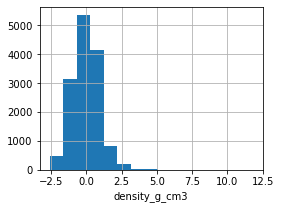

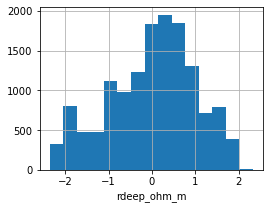

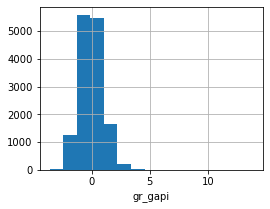

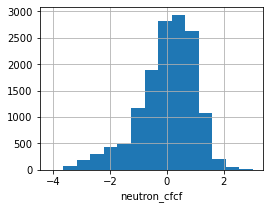

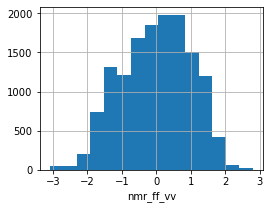

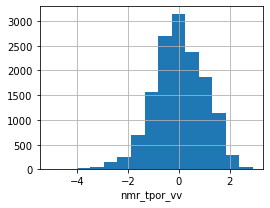

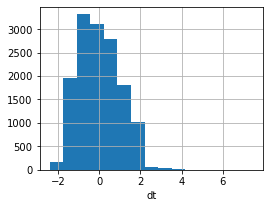

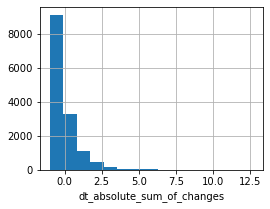

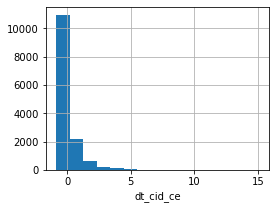

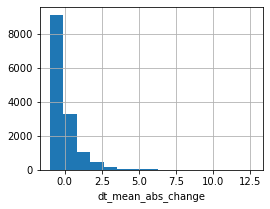

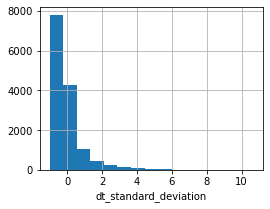

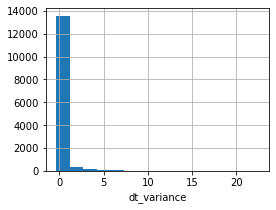

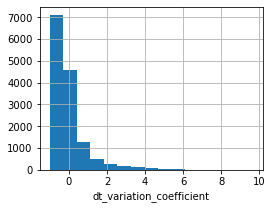

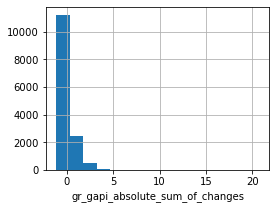

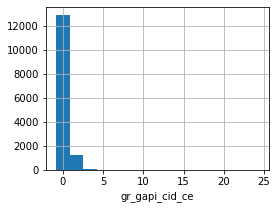

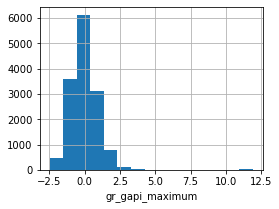

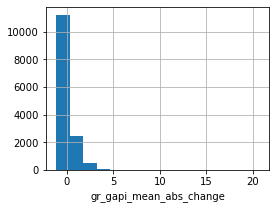

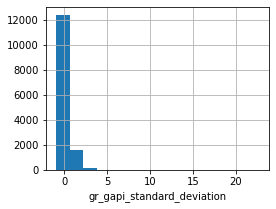

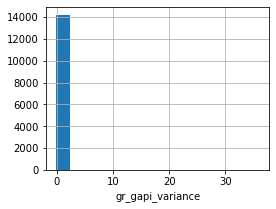

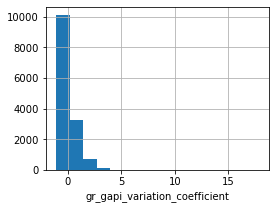

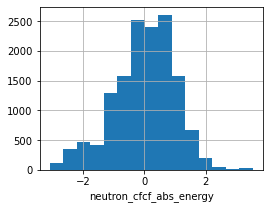

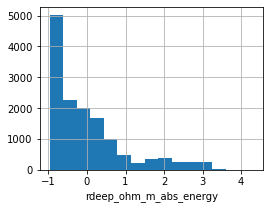

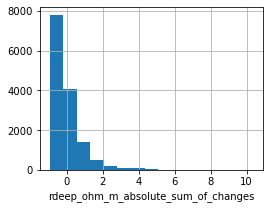

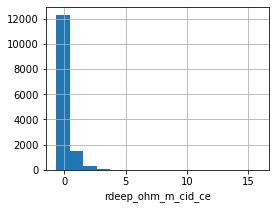

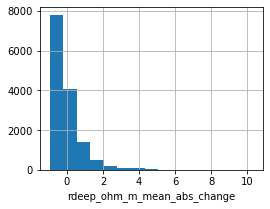

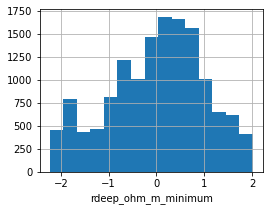

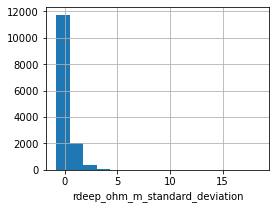

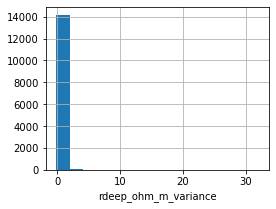

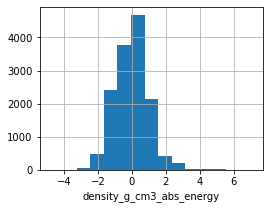

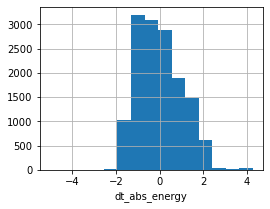

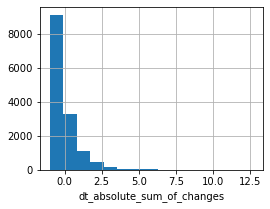

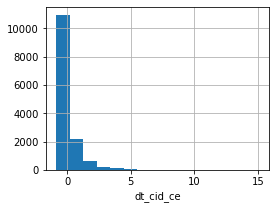

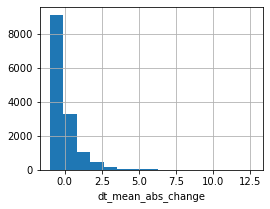

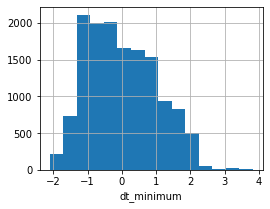

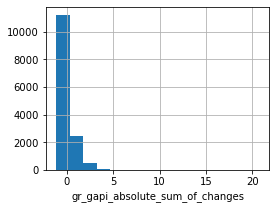

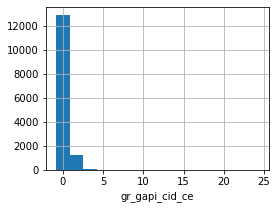

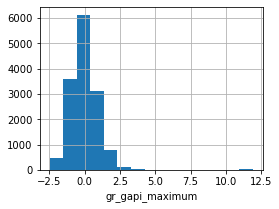

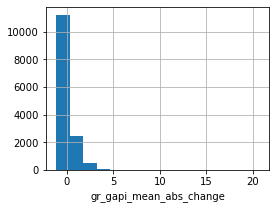

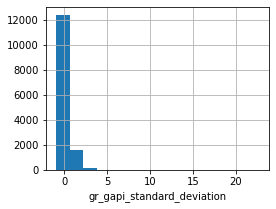

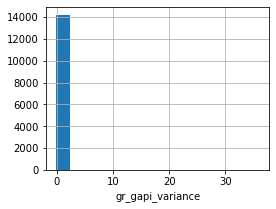

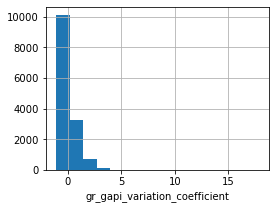

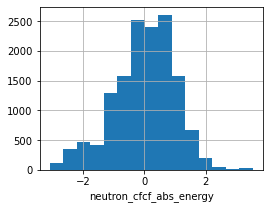

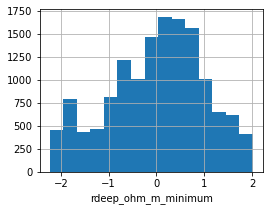

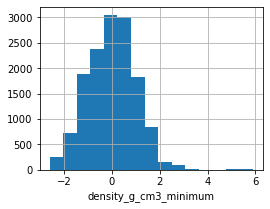

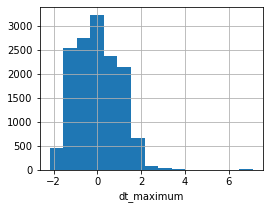

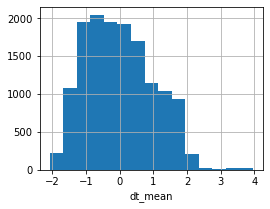

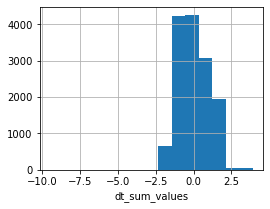

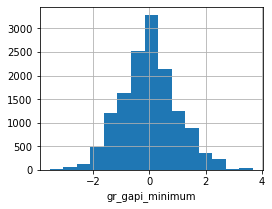

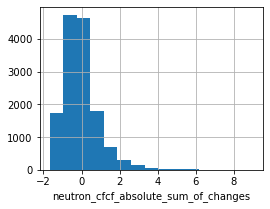

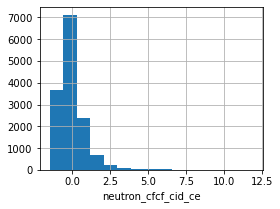

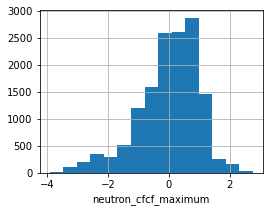

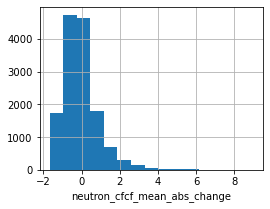

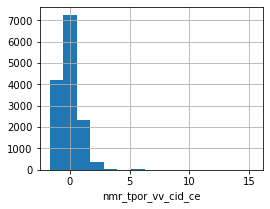

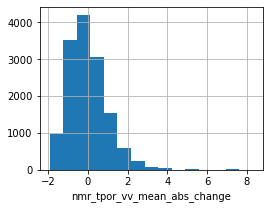

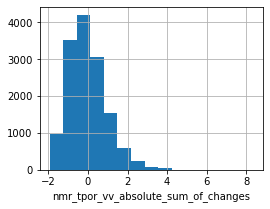

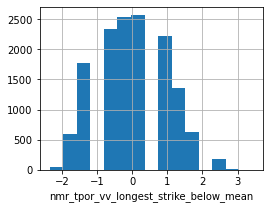

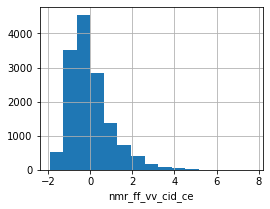

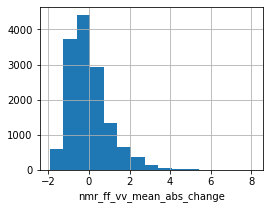

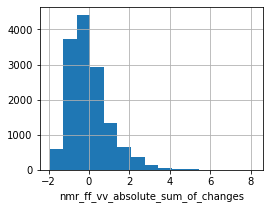

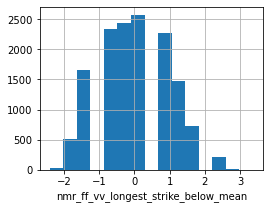

In [171]:
# set of histograms
for feature in to_scale:
    plt.figure(figsize=(4,3))
    df[feature].hist(bins=15)
    plt.xlabel(feature)
    plt.plot()

C:\Users\andrew.nedilko\Anaconda3\envs\ssedb\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\andrew.nedilko\Anaconda3\envs\ssedb\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\andrew.nedilko\Anaconda3\envs\ssedb\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figur

C:\Users\andrew.nedilko\Anaconda3\envs\ssedb\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\andrew.nedilko\Anaconda3\envs\ssedb\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\andrew.nedilko\Anaconda3\envs\ssedb\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figur

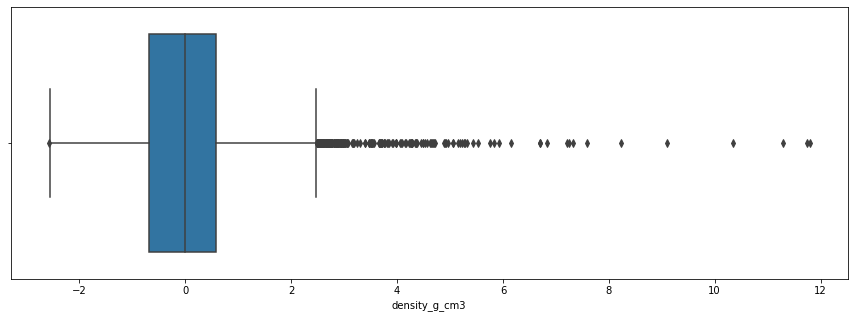

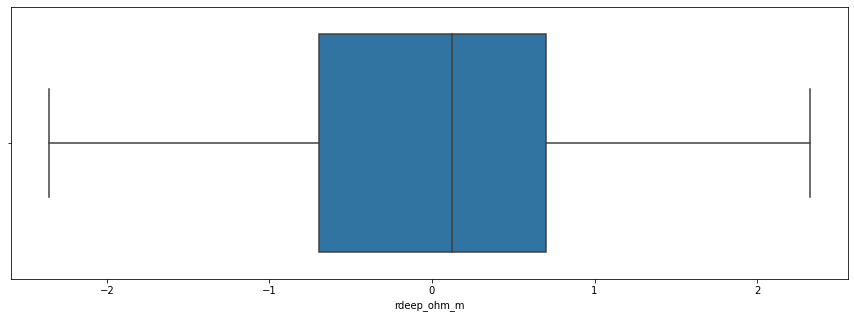

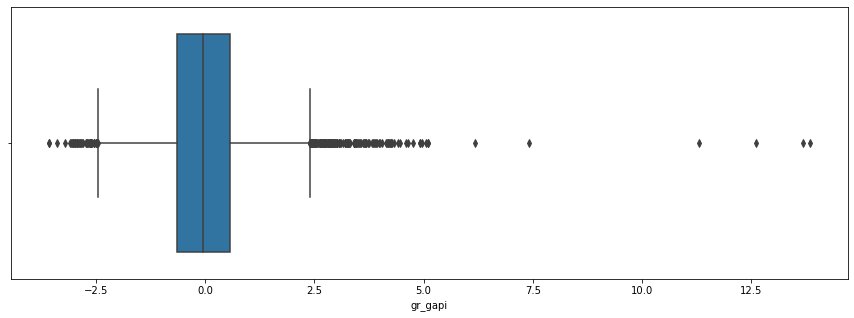

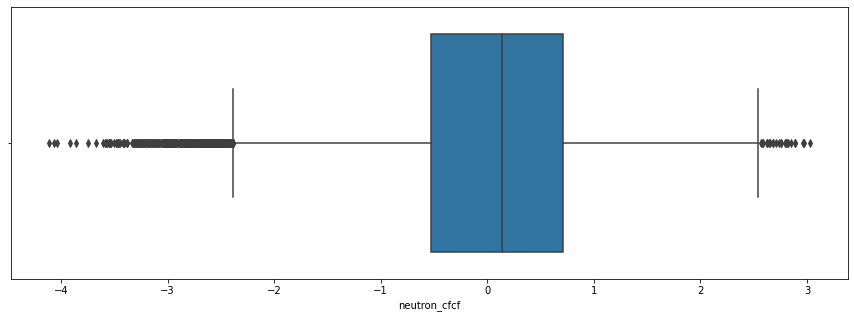

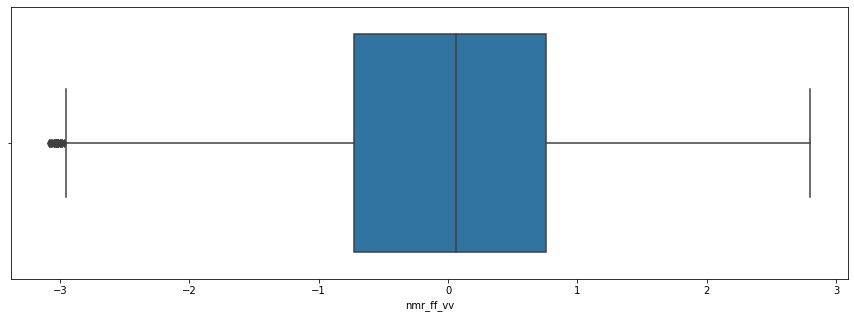

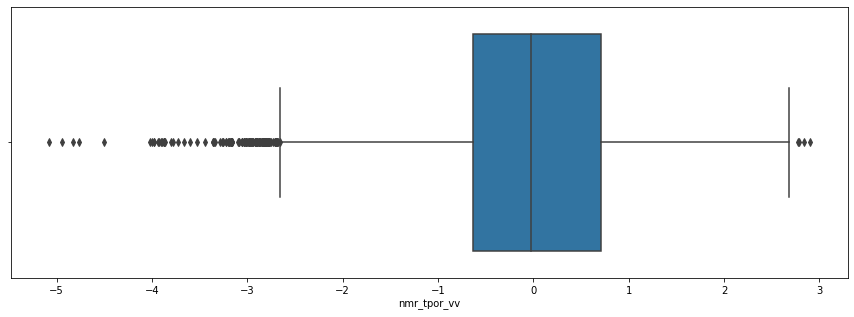

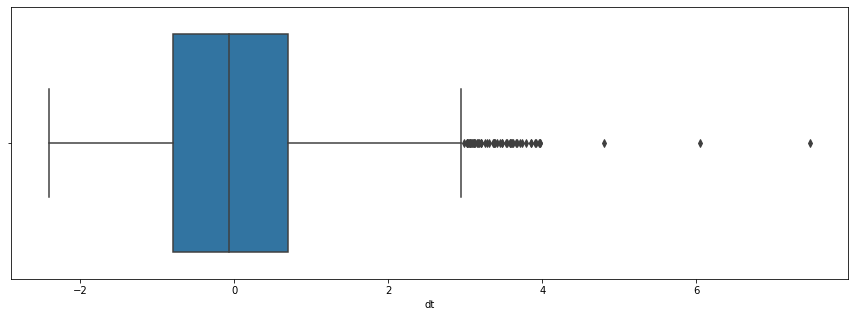

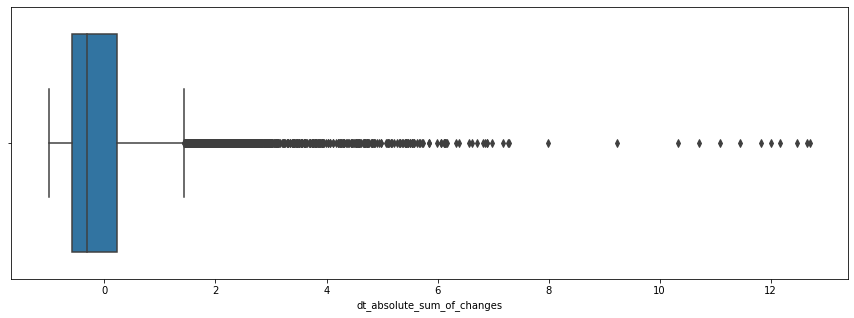

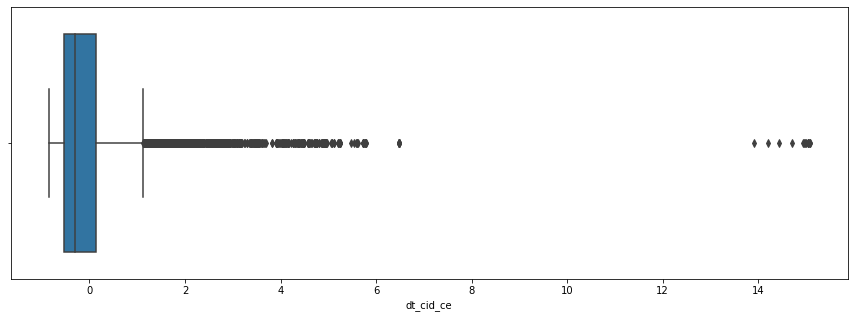

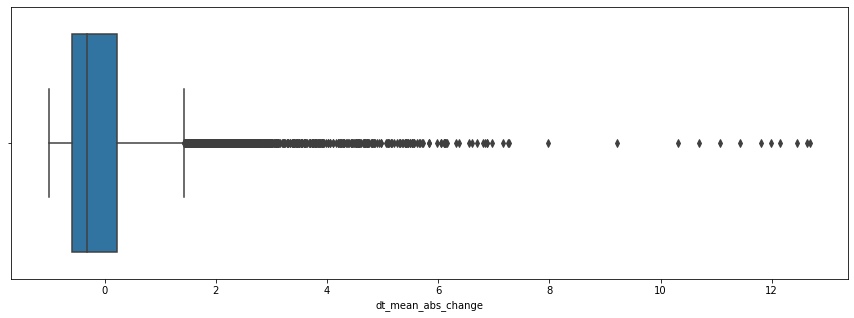

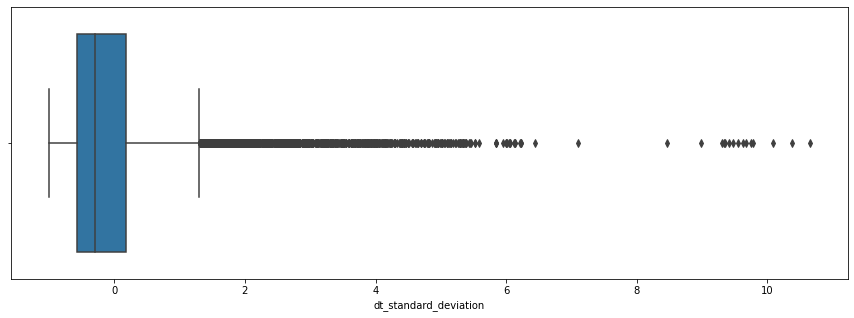

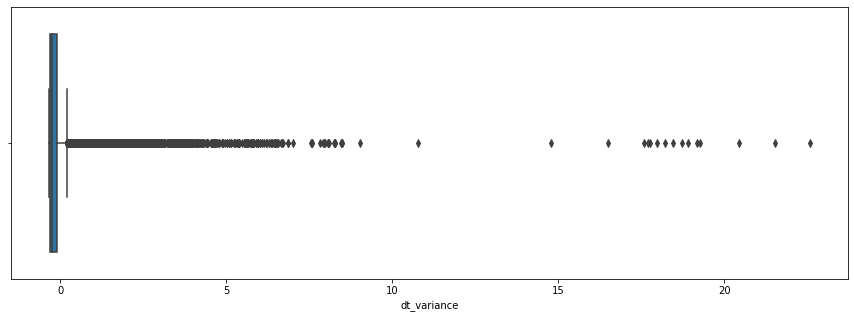

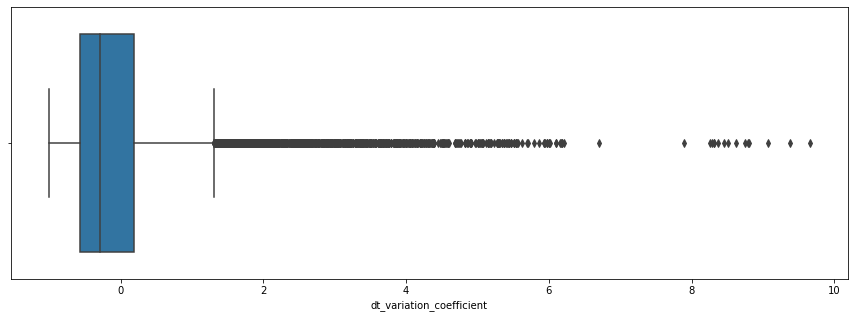

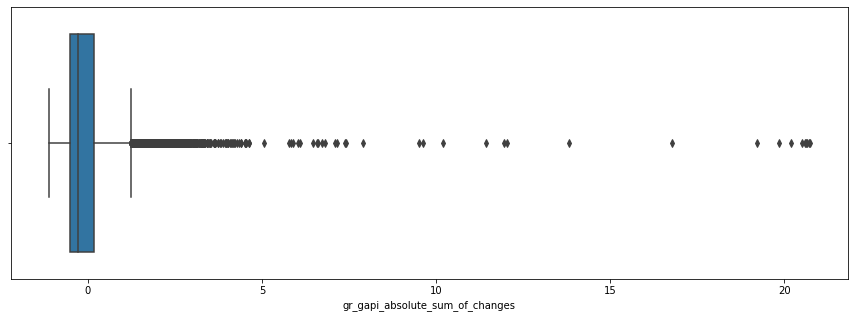

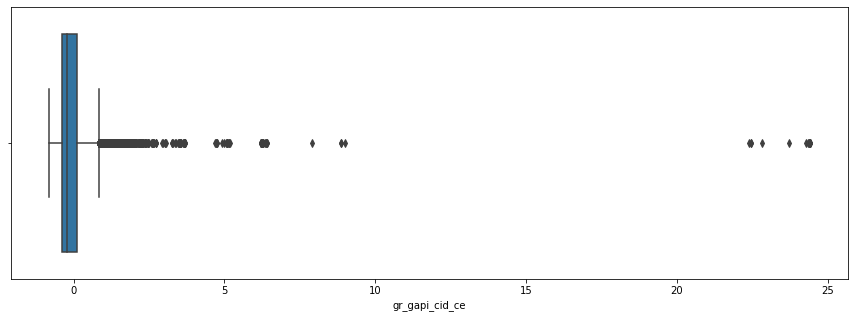

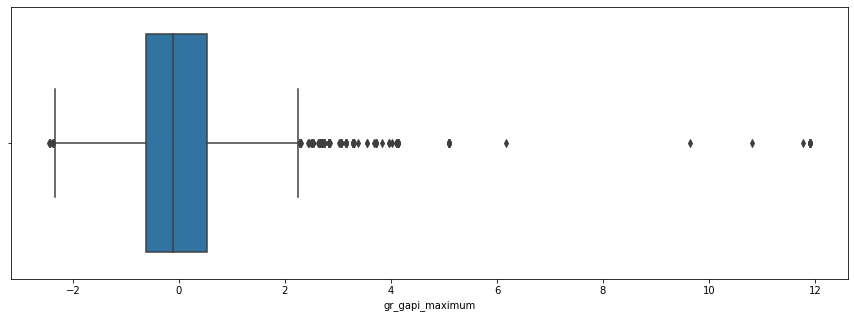

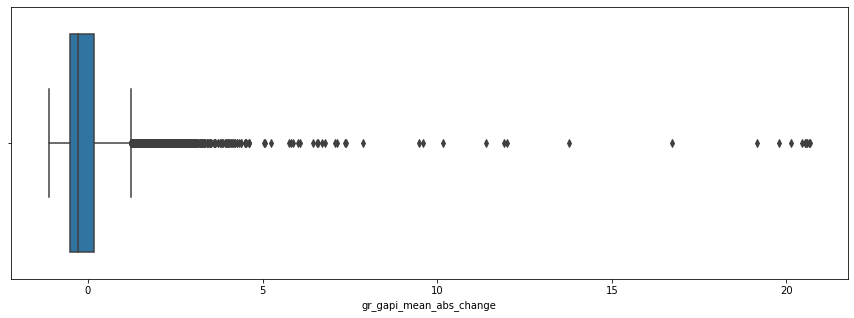

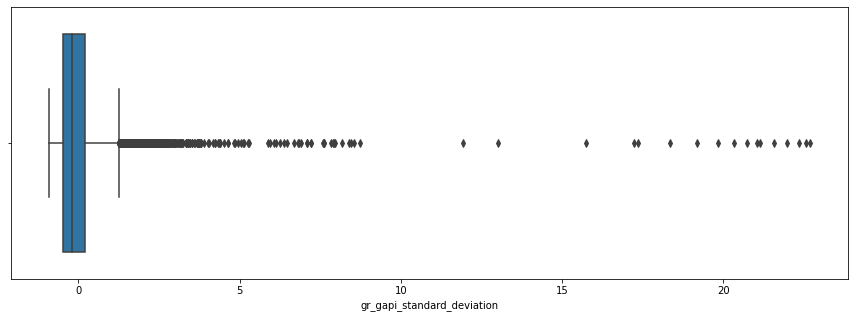

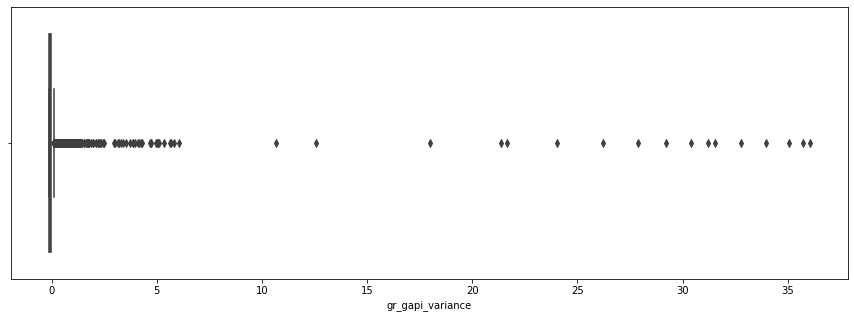

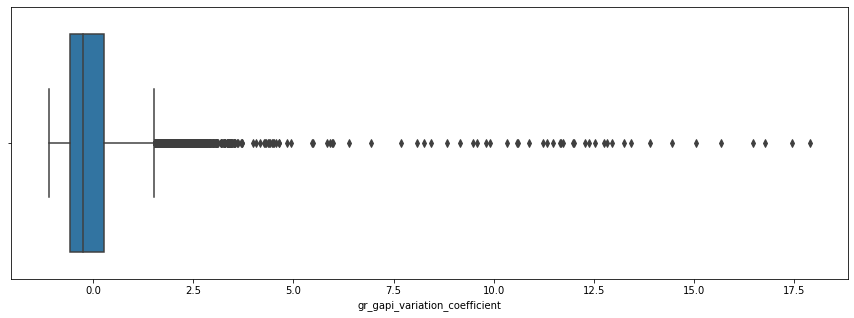

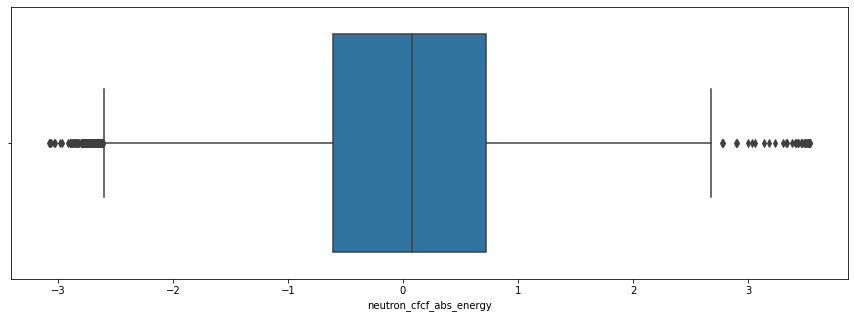

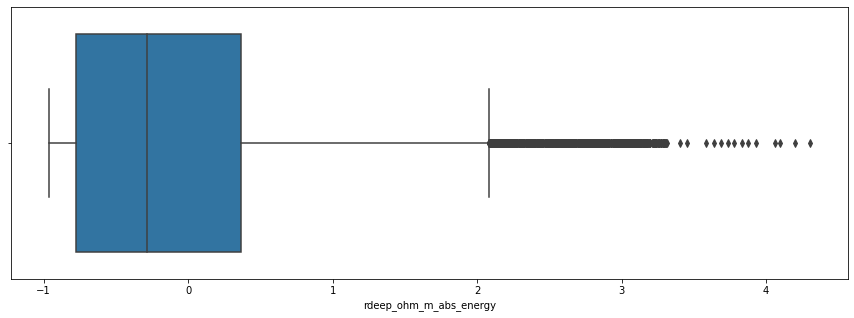

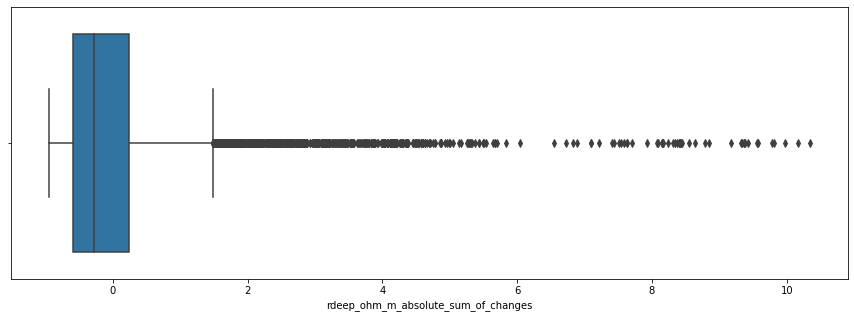

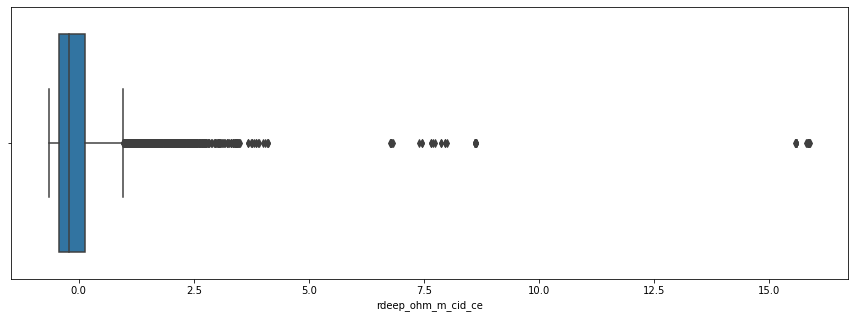

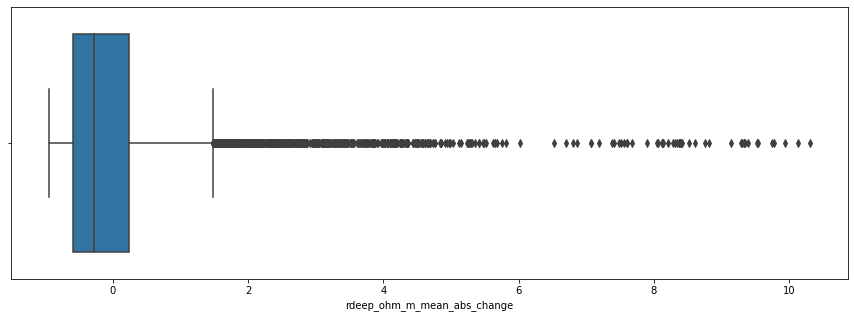

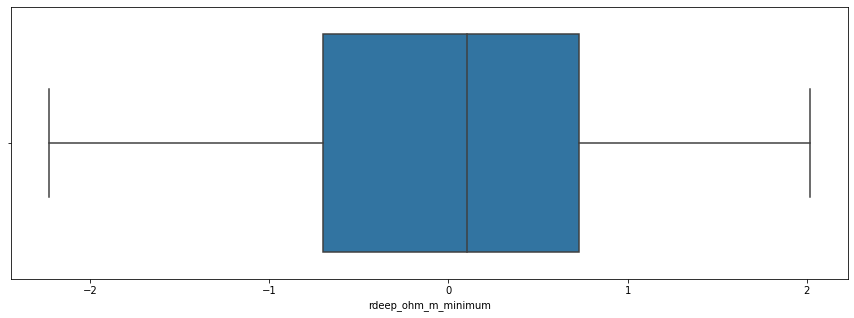

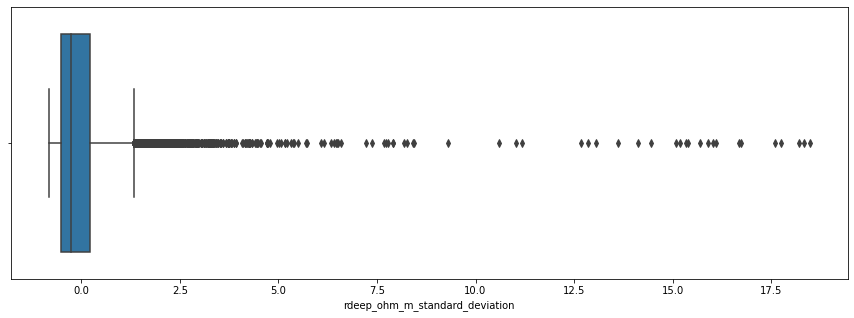

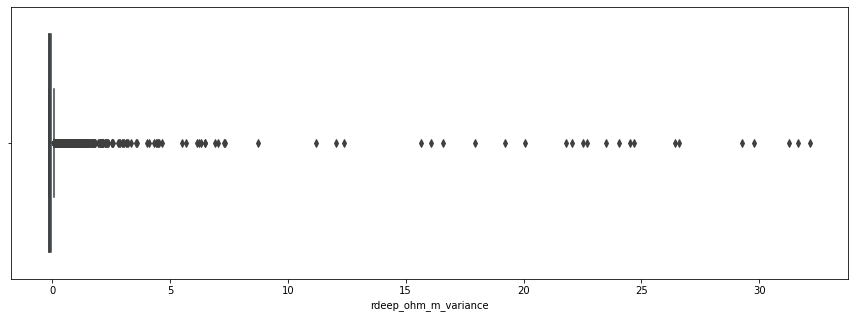

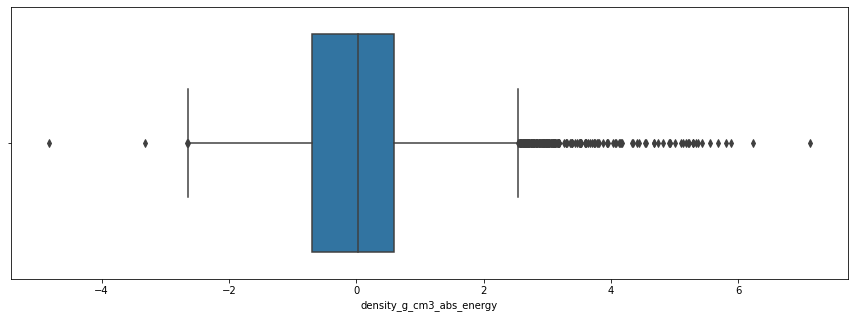

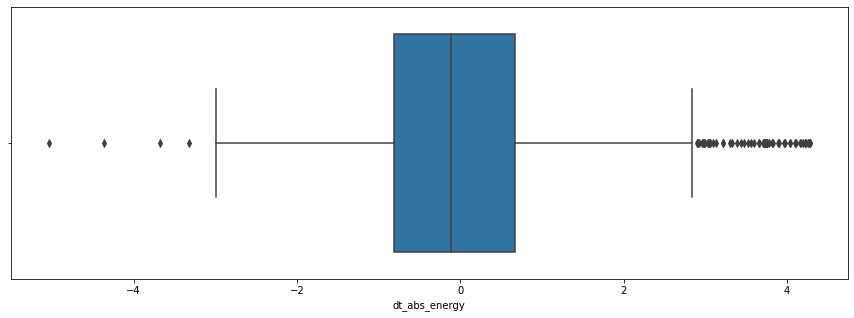

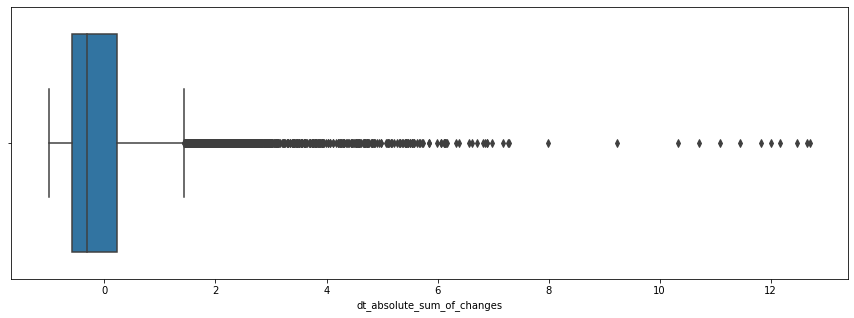

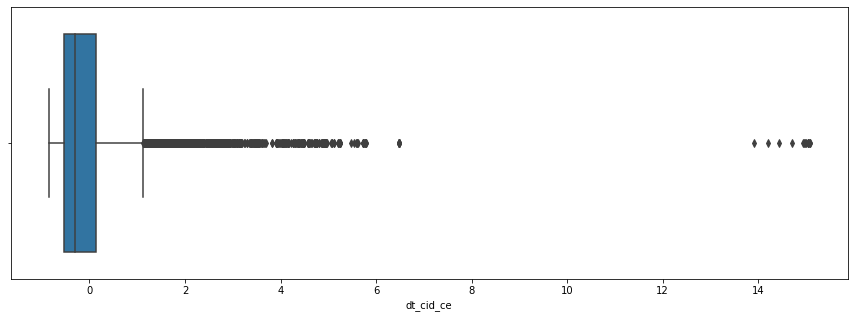

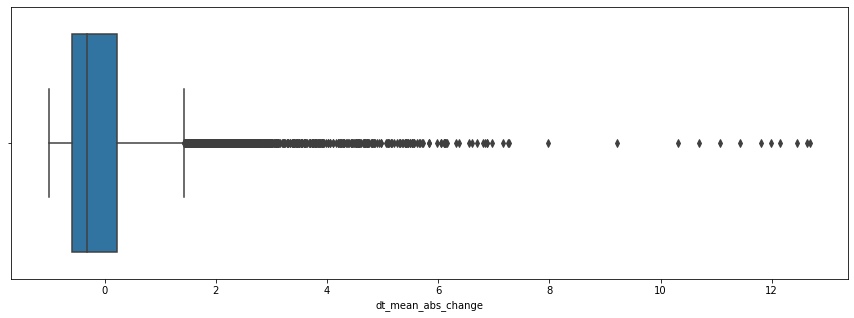

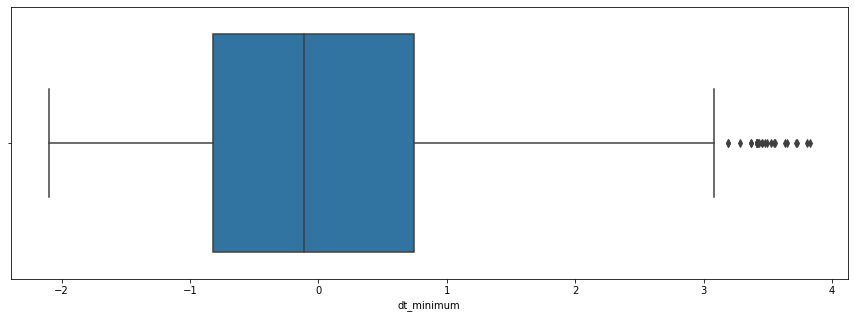

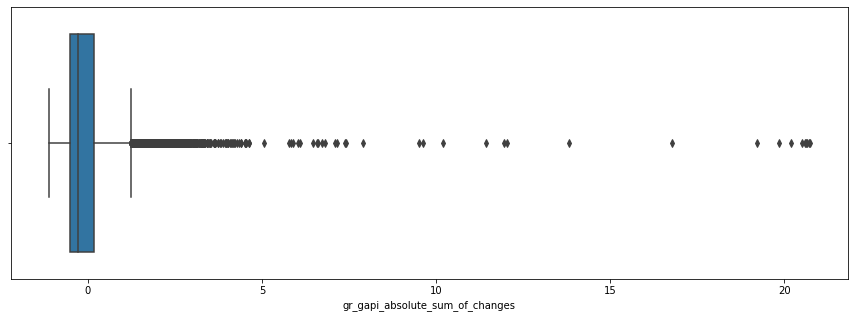

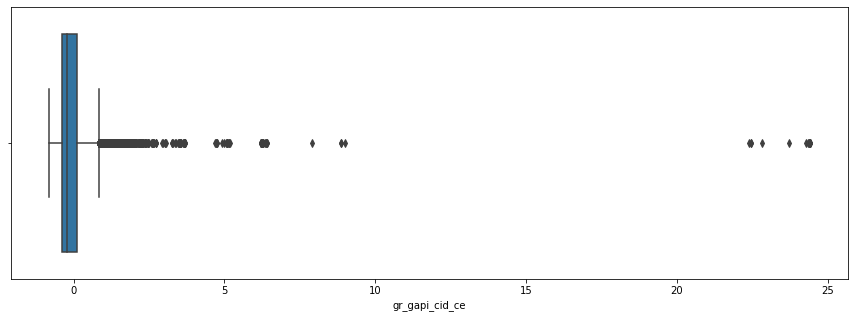

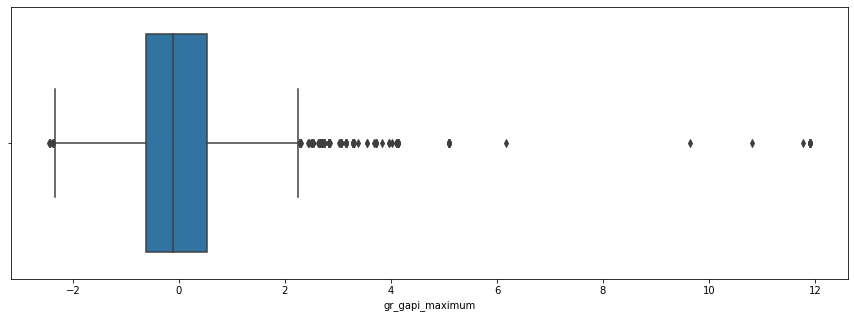

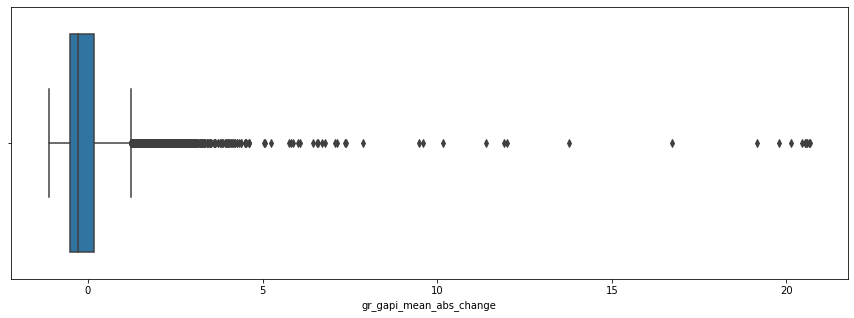

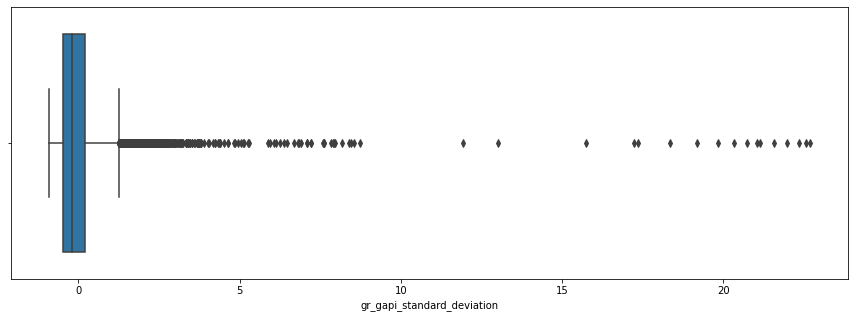

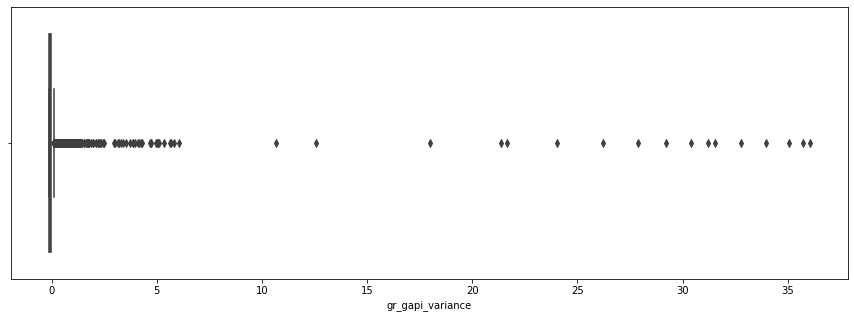

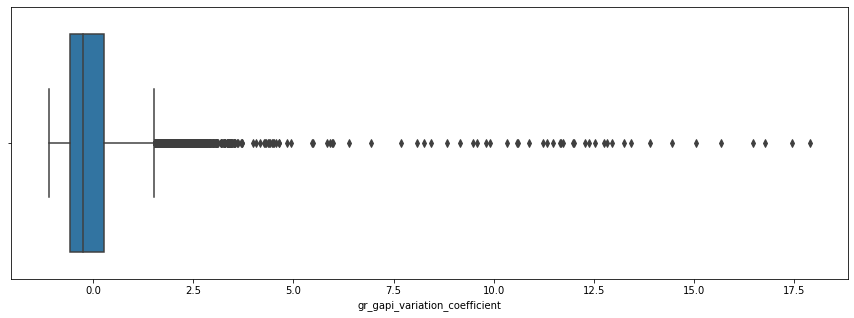

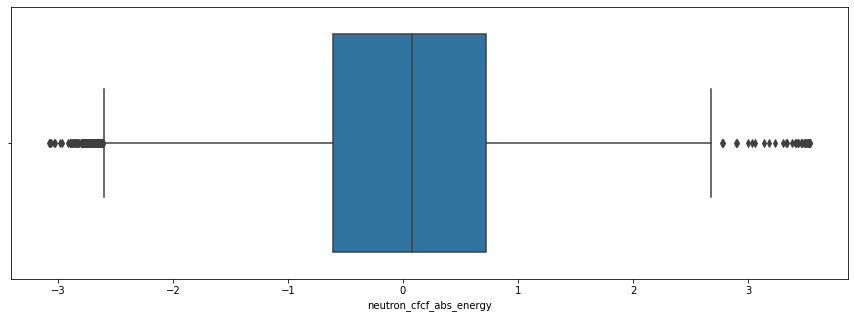

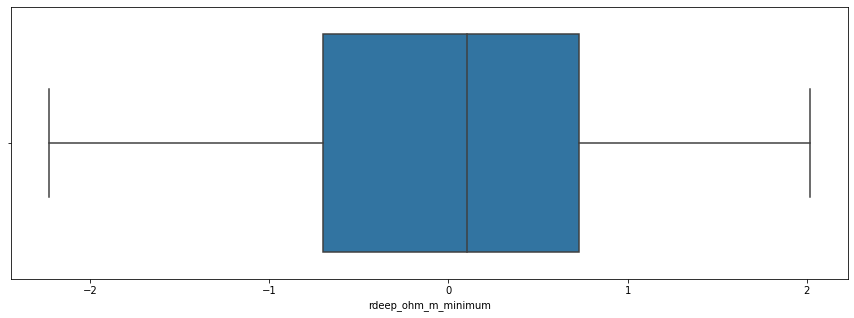

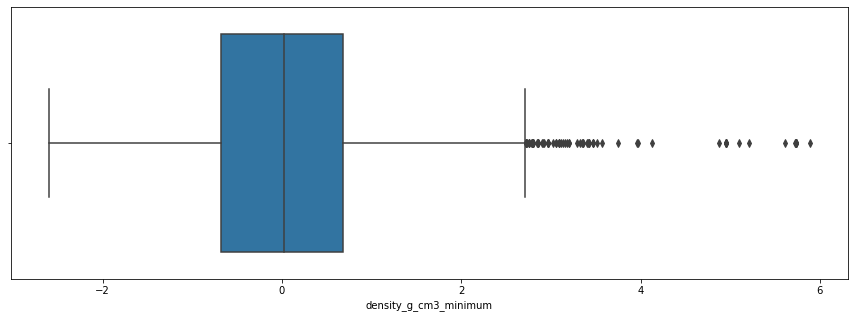

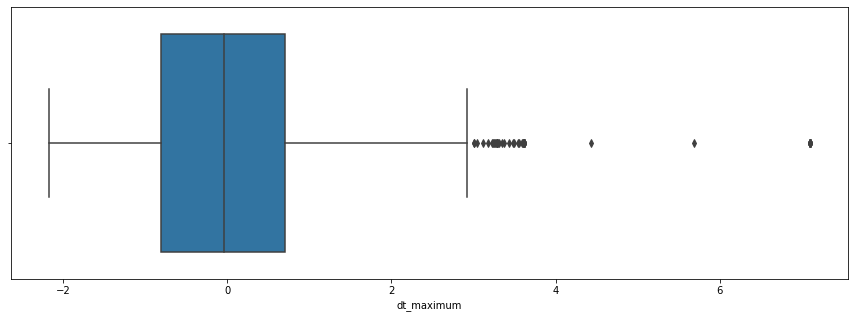

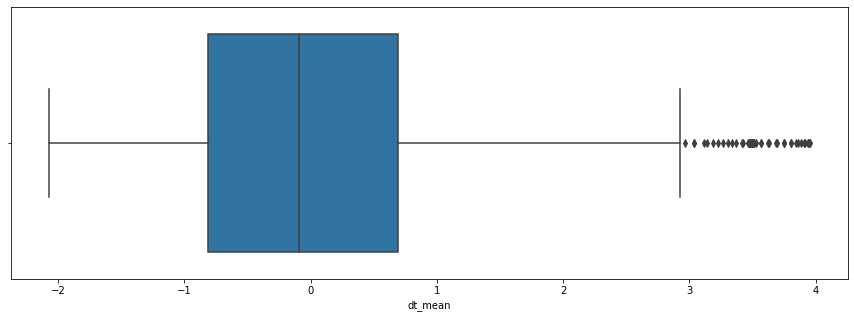

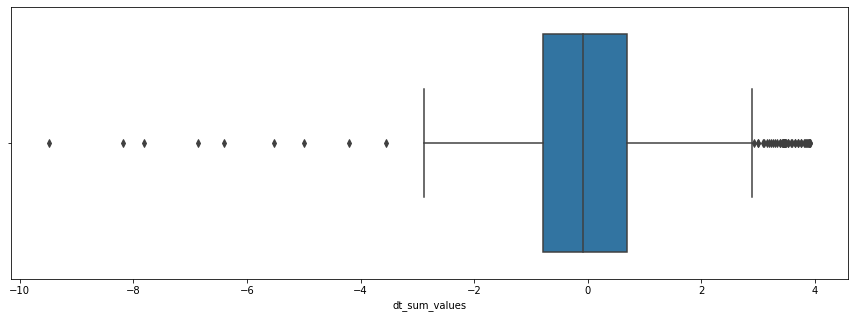

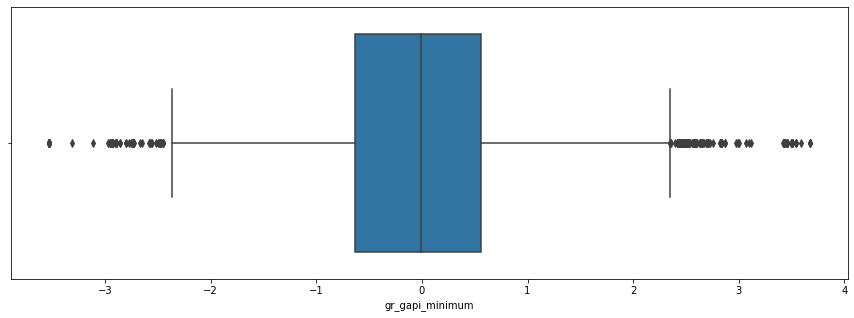

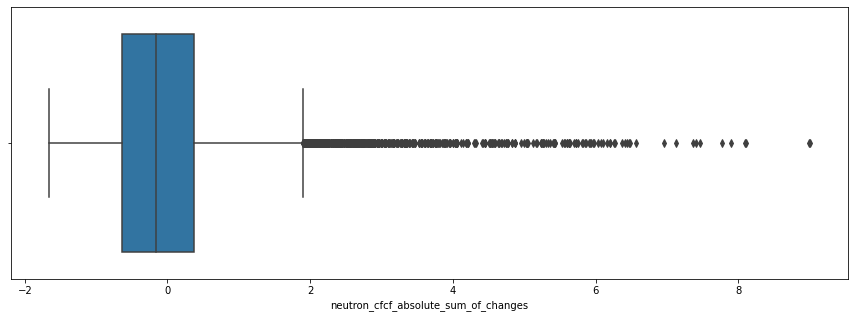

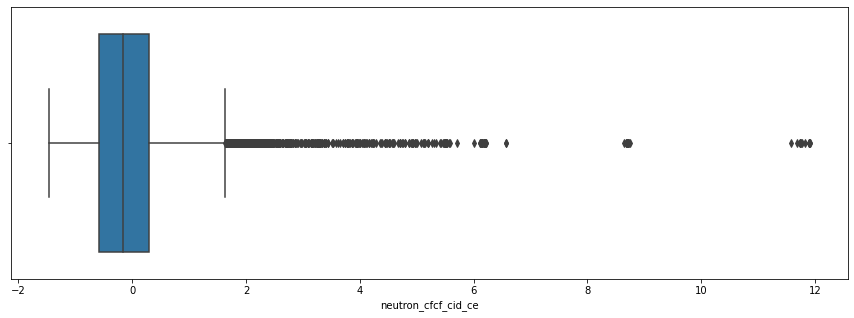

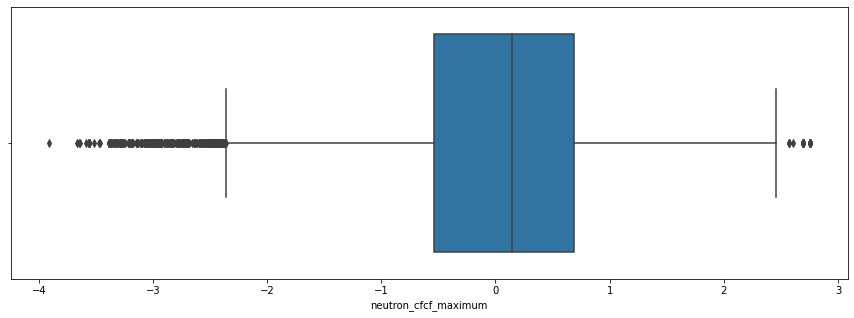

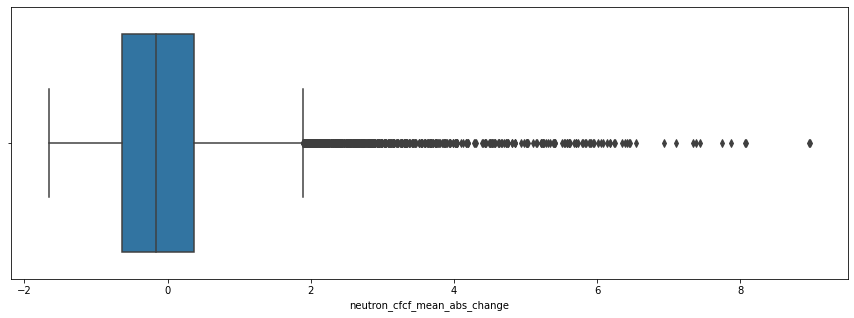

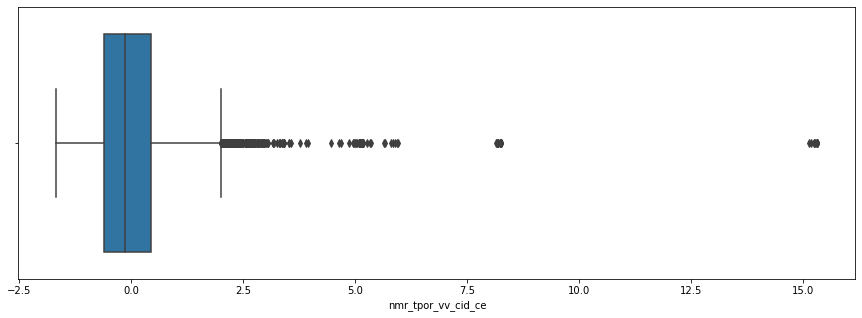

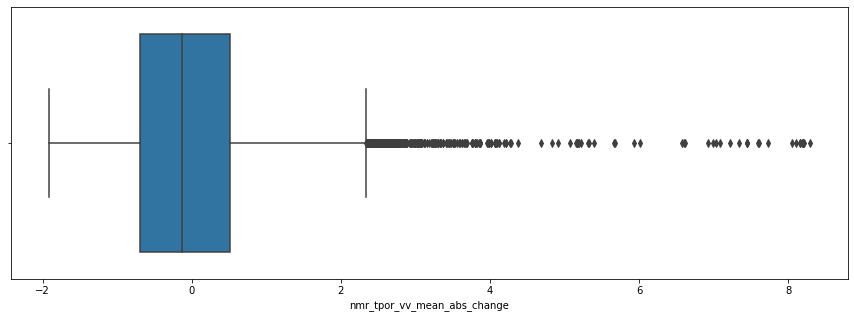

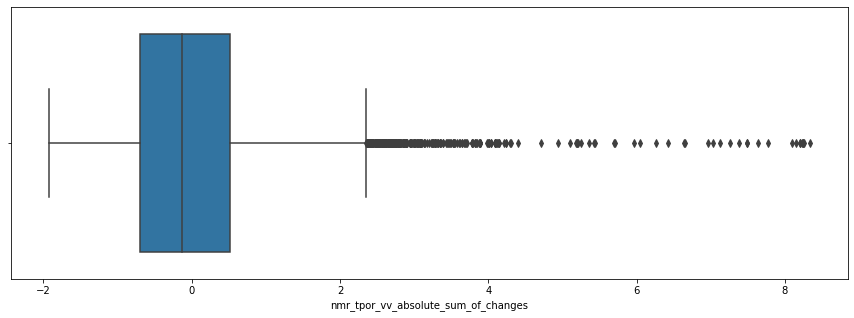

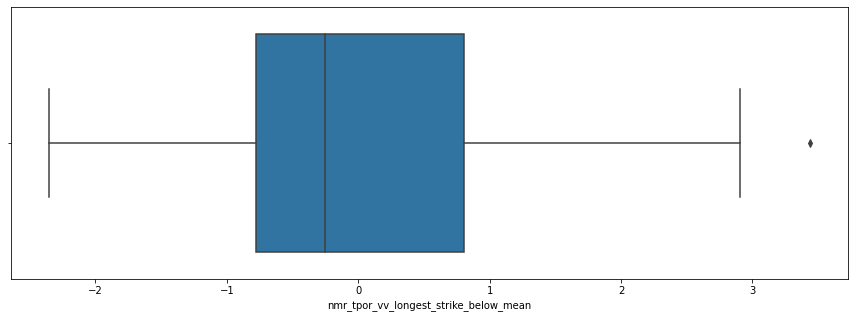

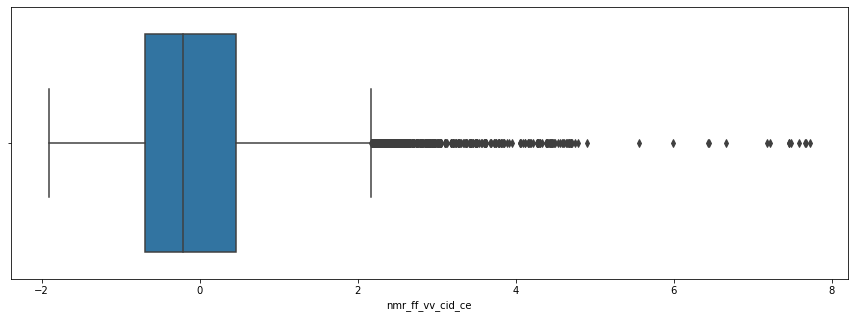

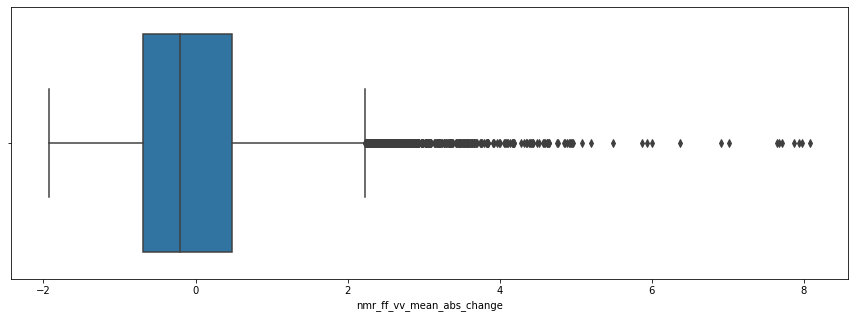

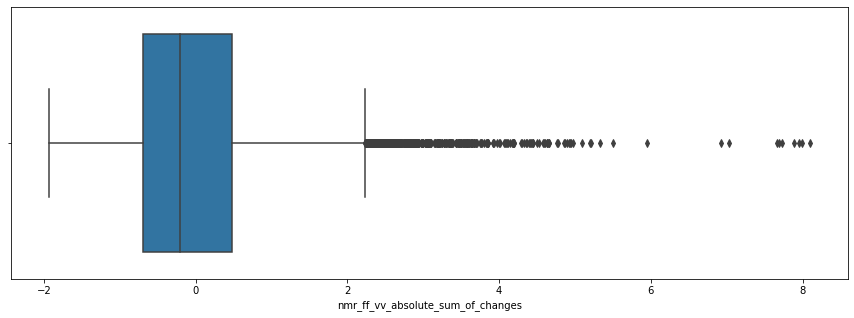

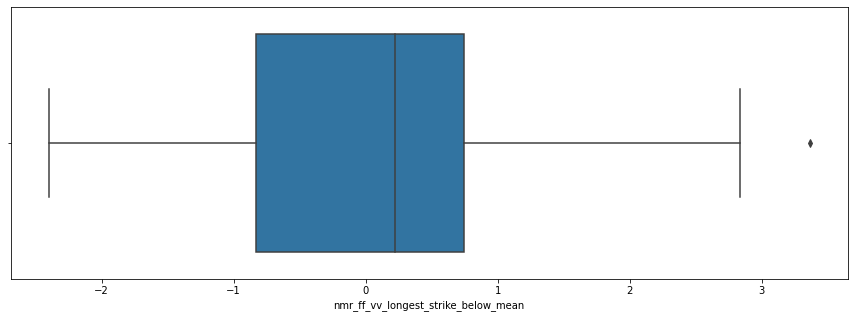

In [172]:
# box plots (after scaling!)
for feature in to_scale:
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    sns.boxplot(x=df[feature])
    #fig.show()

In [ ]:
# scatter plots - useful here?
dfs = [dataset_df, df_bc]
titles = ['Real Data', 'Behavior Cloning']
for col in features_select:
    fig, axs = plt.subplots(1,2, figsize=(15,5))
    for idx, ax in enumerate(axs):    
        ax.scatter(dfs[idx][col], dfs[idx].index)
        ax.set_title(titles[idx])
        ax.set_xlabel(col)
        ax.set_ylabel('Fields')
    plt.tight_layout()